# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count',
                  'synonyms_count', 'orthographic_density']
N_COMPONENTS = 3
BIN_COUNT = 4

Imports and database setup.

In [2]:
from itertools import product

import pandas as pd
import seaborn as sb
from scipy import stats
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.continuous, source=Source.all, past=Past.all, durl=Durl.exclude_past, max_distance=2)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id)\
        .filter(Substitution.model == model)
    print("Got {} substitutions for model {}"
          .format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = \
                substitution.features(feature, sentence_relative='median')
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'feature': feature,
                'source': source,
                'source_rel': source_rel,
                'destination': destination,
                'destination_rel': destination_rel,
                'h0': substitution.feature_average(feature),
                'h0_rel': substitution.feature_average(
                        feature, sentence_relative='median'),
                'h0n': substitution.feature_average(
                        feature, source_synonyms=True),
                'h0n_rel': substitution.feature_average(
                        feature, source_synonyms=True,
                        sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 4941 substitutions for model Model(time=Time.continuous, source=Source.all, past=Past.all, durl=Durl.exclude_past, max_distance=2)


  0% (   0 of 4941) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   9 of 4941) |                       | Elapsed Time: 0:00:25 ETA: 3:54:17

  0% (  23 of 4941) |                       | Elapsed Time: 0:00:25 ETA: 1:32:11

  0% (  40 of 4941) |                       | Elapsed Time: 0:00:26 ETA: 0:53:15

  1% (  55 of 4941) |                       | Elapsed Time: 0:00:26 ETA: 0:38:56

  1% (  69 of 4941) |                       | Elapsed Time: 0:00:26 ETA: 0:01:09

  1% (  85 of 4941) |                       | Elapsed Time: 0:00:26 ETA: 0:01:06

  2% ( 101 of 4941) |                       | Elapsed Time: 0:00:26 ETA: 0:01:07

  2% ( 115 of 4941) |                       | Elapsed Time: 0:00:27 ETA: 0:01:11

  2% ( 131 of 4941) |                       | Elapsed Time: 0:00:27 ETA: 0:01:10

  2% ( 147 of 4941) |                       | Elapsed Time: 0:00:27 ETA: 0:01:09

  3% ( 161 of 4941) |                       | Elapsed Time: 0:00:27 ETA: 0:01:09

  3% ( 177 of 4941) |                       | Elapsed Time: 0:00:28 ETA: 0:01:08

  3% ( 194 of 4941) |                       | Elapsed Time: 0:00:28 ETA: 0:01:07

  4% ( 208 of 4941) |                       | Elapsed Time: 0:00:28 ETA: 0:01:07

  4% ( 223 of 4941) |#                      | Elapsed Time: 0:00:28 ETA: 0:01:07

  4% ( 239 of 4941) |#                      | Elapsed Time: 0:00:28 ETA: 0:01:07

  5% ( 256 of 4941) |#                      | Elapsed Time: 0:00:29 ETA: 0:01:08

  5% ( 269 of 4941) |#                      | Elapsed Time: 0:00:29 ETA: 0:01:10

  5% ( 283 of 4941) |#                      | Elapsed Time: 0:00:29 ETA: 0:01:12

  5% ( 295 of 4941) |#                      | Elapsed Time: 0:00:29 ETA: 0:01:14

  6% ( 309 of 4941) |#                      | Elapsed Time: 0:00:30 ETA: 0:01:14

  6% ( 324 of 4941) |#                      | Elapsed Time: 0:00:30 ETA: 0:01:13

  6% ( 340 of 4941) |#                      | Elapsed Time: 0:00:30 ETA: 0:01:08

  7% ( 354 of 4941) |#                      | Elapsed Time: 0:00:30 ETA: 0:01:07

  7% ( 371 of 4941) |#                      | Elapsed Time: 0:00:30 ETA: 0:01:04

  7% ( 386 of 4941) |#                      | Elapsed Time: 0:00:31 ETA: 0:01:04

  8% ( 400 of 4941) |#                      | Elapsed Time: 0:00:31 ETA: 0:01:05

  8% ( 416 of 4941) |#                      | Elapsed Time: 0:00:31 ETA: 0:01:04

  8% ( 433 of 4941) |##                     | Elapsed Time: 0:00:31 ETA: 0:01:03

  9% ( 449 of 4941) |##                     | Elapsed Time: 0:00:32 ETA: 0:01:02

  9% ( 466 of 4941) |##                     | Elapsed Time: 0:00:32 ETA: 0:01:00

  9% ( 482 of 4941) |##                     | Elapsed Time: 0:00:32 ETA: 0:00:59

 10% ( 503 of 4941) |##                     | Elapsed Time: 0:00:32 ETA: 0:01:00

 10% ( 519 of 4941) |##                     | Elapsed Time: 0:00:32 ETA: 0:00:59

 10% ( 534 of 4941) |##                     | Elapsed Time: 0:00:33 ETA: 0:00:59

 11% ( 556 of 4941) |##                     | Elapsed Time: 0:00:33 ETA: 0:01:00

 11% ( 570 of 4941) |##                     | Elapsed Time: 0:00:33 ETA: 0:01:00

 11% ( 585 of 4941) |##                     | Elapsed Time: 0:00:33 ETA: 0:01:01

 12% ( 598 of 4941) |##                     | Elapsed Time: 0:00:34 ETA: 0:01:03

 12% ( 611 of 4941) |##                     | Elapsed Time: 0:00:34 ETA: 0:01:04

 12% ( 625 of 4941) |##                     | Elapsed Time: 0:00:34 ETA: 0:01:06

 12% ( 639 of 4941) |##                     | Elapsed Time: 0:00:34 ETA: 0:01:07

 13% ( 657 of 4941) |###                    | Elapsed Time: 0:00:34 ETA: 0:01:03

 13% ( 673 of 4941) |###                    | Elapsed Time: 0:00:35 ETA: 0:00:58

 13% ( 688 of 4941) |###                    | Elapsed Time: 0:00:35 ETA: 0:00:58

 14% ( 705 of 4941) |###                    | Elapsed Time: 0:00:35 ETA: 0:00:56

 14% ( 720 of 4941) |###                    | Elapsed Time: 0:00:35 ETA: 0:00:55

 14% ( 734 of 4941) |###                    | Elapsed Time: 0:00:36 ETA: 0:00:58

 15% ( 750 of 4941) |###                    | Elapsed Time: 0:00:36 ETA: 0:00:59

 15% ( 765 of 4941) |###                    | Elapsed Time: 0:00:36 ETA: 0:00:59

 15% ( 779 of 4941) |###                    | Elapsed Time: 0:00:36 ETA: 0:01:01

 16% ( 792 of 4941) |###                    | Elapsed Time: 0:00:36 ETA: 0:01:00

 16% ( 811 of 4941) |###                    | Elapsed Time: 0:00:37 ETA: 0:00:59

 16% ( 826 of 4941) |###                    | Elapsed Time: 0:00:37 ETA: 0:01:00

 17% ( 841 of 4941) |###                    | Elapsed Time: 0:00:37 ETA: 0:00:59

 17% ( 856 of 4941) |###                    | Elapsed Time: 0:00:37 ETA: 0:00:59

 17% ( 873 of 4941) |####                   | Elapsed Time: 0:00:38 ETA: 0:00:58

 17% ( 887 of 4941) |####                   | Elapsed Time: 0:00:38 ETA: 0:00:58

 18% ( 902 of 4941) |####                   | Elapsed Time: 0:00:38 ETA: 0:00:59

 18% ( 917 of 4941) |####                   | Elapsed Time: 0:00:38 ETA: 0:00:57

 18% ( 935 of 4941) |####                   | Elapsed Time: 0:00:38 ETA: 0:00:57

 19% ( 949 of 4941) |####                   | Elapsed Time: 0:00:39 ETA: 0:00:58

 19% ( 962 of 4941) |####                   | Elapsed Time: 0:00:39 ETA: 0:00:59

 19% ( 976 of 4941) |####                   | Elapsed Time: 0:00:39 ETA: 0:00:59

 20% ( 989 of 4941) |####                   | Elapsed Time: 0:00:39 ETA: 0:01:01

 20% (1004 of 4941) |####                   | Elapsed Time: 0:00:40 ETA: 0:01:00

 20% (1019 of 4941) |####                   | Elapsed Time: 0:00:40 ETA: 0:00:59

 20% (1034 of 4941) |####                   | Elapsed Time: 0:00:40 ETA: 0:00:58

 21% (1050 of 4941) |####                   | Elapsed Time: 0:00:40 ETA: 0:00:57

 21% (1066 of 4941) |####                   | Elapsed Time: 0:00:40 ETA: 0:00:54

 21% (1080 of 4941) |#####                  | Elapsed Time: 0:00:41 ETA: 0:00:54

 22% (1094 of 4941) |#####                  | Elapsed Time: 0:00:41 ETA: 0:00:54

 22% (1112 of 4941) |#####                  | Elapsed Time: 0:00:41 ETA: 0:00:54

 22% (1128 of 4941) |#####                  | Elapsed Time: 0:00:41 ETA: 0:00:55

 23% (1143 of 4941) |#####                  | Elapsed Time: 0:00:42 ETA: 0:00:55

 23% (1156 of 4941) |#####                  | Elapsed Time: 0:00:42 ETA: 0:00:55

 23% (1174 of 4941) |#####                  | Elapsed Time: 0:00:42 ETA: 0:00:55

 24% (1188 of 4941) |#####                  | Elapsed Time: 0:00:42 ETA: 0:00:56

 24% (1202 of 4941) |#####                  | Elapsed Time: 0:00:42 ETA: 0:00:56

 24% (1216 of 4941) |#####                  | Elapsed Time: 0:00:43 ETA: 0:00:56

 25% (1236 of 4941) |#####                  | Elapsed Time: 0:00:43 ETA: 0:00:54

 25% (1251 of 4941) |#####                  | Elapsed Time: 0:00:43 ETA: 0:00:53

 25% (1266 of 4941) |#####                  | Elapsed Time: 0:00:43 ETA: 0:00:52

 25% (1282 of 4941) |#####                  | Elapsed Time: 0:00:44 ETA: 0:00:51

 26% (1298 of 4941) |######                 | Elapsed Time: 0:00:44 ETA: 0:00:50

 26% (1313 of 4941) |######                 | Elapsed Time: 0:00:44 ETA: 0:00:51

 26% (1327 of 4941) |######                 | Elapsed Time: 0:00:44 ETA: 0:00:51

 27% (1342 of 4941) |######                 | Elapsed Time: 0:00:44 ETA: 0:00:51

 27% (1359 of 4941) |######                 | Elapsed Time: 0:00:45 ETA: 0:00:53

 27% (1374 of 4941) |######                 | Elapsed Time: 0:00:45 ETA: 0:00:52

 28% (1390 of 4941) |######                 | Elapsed Time: 0:00:45 ETA: 0:00:52

 28% (1404 of 4941) |######                 | Elapsed Time: 0:00:45 ETA: 0:00:52

 28% (1421 of 4941) |######                 | Elapsed Time: 0:00:46 ETA: 0:00:52

 29% (1435 of 4941) |######                 | Elapsed Time: 0:00:46 ETA: 0:00:50

 29% (1448 of 4941) |######                 | Elapsed Time: 0:00:46 ETA: 0:00:52

 29% (1463 of 4941) |######                 | Elapsed Time: 0:00:46 ETA: 0:00:52

 30% (1483 of 4941) |######                 | Elapsed Time: 0:00:47 ETA: 0:00:52

 30% (1497 of 4941) |######                 | Elapsed Time: 0:00:47 ETA: 0:00:52

 30% (1507 of 4941) |#######                | Elapsed Time: 0:00:48 ETA: 0:01:34

 30% (1522 of 4941) |#######                | Elapsed Time: 0:00:48 ETA: 0:01:33

 31% (1535 of 4941) |#######                | Elapsed Time: 0:00:48 ETA: 0:01:35

 31% (1552 of 4941) |#######                | Elapsed Time: 0:00:48 ETA: 0:01:37

 31% (1566 of 4941) |#######                | Elapsed Time: 0:00:49 ETA: 0:00:52

 32% (1582 of 4941) |#######                | Elapsed Time: 0:00:49 ETA: 0:00:49

 32% (1597 of 4941) |#######                | Elapsed Time: 0:00:49 ETA: 0:00:48

 32% (1614 of 4941) |#######                | Elapsed Time: 0:00:49 ETA: 0:00:47

 32% (1628 of 4941) |#######                | Elapsed Time: 0:00:49 ETA: 0:00:48

 33% (1643 of 4941) |#######                | Elapsed Time: 0:00:50 ETA: 0:00:48

 33% (1658 of 4941) |#######                | Elapsed Time: 0:00:50 ETA: 0:00:48

 33% (1675 of 4941) |#######                | Elapsed Time: 0:00:50 ETA: 0:00:49

 34% (1689 of 4941) |#######                | Elapsed Time: 0:00:50 ETA: 0:00:49

 34% (1703 of 4941) |#######                | Elapsed Time: 0:00:51 ETA: 0:00:49

 34% (1720 of 4941) |########               | Elapsed Time: 0:00:51 ETA: 0:00:46

 35% (1738 of 4941) |########               | Elapsed Time: 0:00:51 ETA: 0:00:46

 35% (1752 of 4941) |########               | Elapsed Time: 0:00:51 ETA: 0:00:46

 35% (1766 of 4941) |########               | Elapsed Time: 0:00:52 ETA: 0:00:46

 36% (1780 of 4941) |########               | Elapsed Time: 0:00:52 ETA: 0:00:47

 36% (1800 of 4941) |########               | Elapsed Time: 0:00:52 ETA: 0:00:46

 36% (1814 of 4941) |########               | Elapsed Time: 0:00:52 ETA: 0:00:47

 37% (1829 of 4941) |########               | Elapsed Time: 0:00:52 ETA: 0:00:45

 37% (1844 of 4941) |########               | Elapsed Time: 0:00:53 ETA: 0:00:45

 37% (1860 of 4941) |########               | Elapsed Time: 0:00:53 ETA: 0:00:45

 37% (1875 of 4941) |########               | Elapsed Time: 0:00:53 ETA: 0:00:44

 38% (1889 of 4941) |########               | Elapsed Time: 0:00:53 ETA: 0:00:43

 38% (1903 of 4941) |########               | Elapsed Time: 0:00:54 ETA: 0:00:44

 38% (1922 of 4941) |########               | Elapsed Time: 0:00:54 ETA: 0:00:44

 39% (1937 of 4941) |#########              | Elapsed Time: 0:00:54 ETA: 0:00:44

 39% (1951 of 4941) |#########              | Elapsed Time: 0:00:54 ETA: 0:00:44

 39% (1968 of 4941) |#########              | Elapsed Time: 0:00:54 ETA: 0:00:42

 40% (1985 of 4941) |#########              | Elapsed Time: 0:00:55 ETA: 0:00:42

 40% (1999 of 4941) |#########              | Elapsed Time: 0:00:55 ETA: 0:00:42

 40% (2014 of 4941) |#########              | Elapsed Time: 0:00:55 ETA: 0:00:41

 41% (2030 of 4941) |#########              | Elapsed Time: 0:00:55 ETA: 0:00:41

 41% (2046 of 4941) |#########              | Elapsed Time: 0:00:56 ETA: 0:00:41

 41% (2062 of 4941) |#########              | Elapsed Time: 0:00:56 ETA: 0:00:40

 42% (2077 of 4941) |#########              | Elapsed Time: 0:00:56 ETA: 0:00:40

 42% (2091 of 4941) |#########              | Elapsed Time: 0:00:56 ETA: 0:00:40

 42% (2107 of 4941) |#########              | Elapsed Time: 0:00:56 ETA: 0:00:40

 42% (2121 of 4941) |#########              | Elapsed Time: 0:00:57 ETA: 0:00:40

 43% (2135 of 4941) |#########              | Elapsed Time: 0:00:57 ETA: 0:00:40

 43% (2150 of 4941) |##########             | Elapsed Time: 0:00:57 ETA: 0:00:41

 43% (2168 of 4941) |##########             | Elapsed Time: 0:00:57 ETA: 0:00:41

 44% (2182 of 4941) |##########             | Elapsed Time: 0:00:58 ETA: 0:00:41

 44% (2196 of 4941) |##########             | Elapsed Time: 0:00:58 ETA: 0:00:41

 44% (2211 of 4941) |##########             | Elapsed Time: 0:00:58 ETA: 0:00:40

 45% (2232 of 4941) |##########             | Elapsed Time: 0:00:58 ETA: 0:00:39

 45% (2247 of 4941) |##########             | Elapsed Time: 0:00:59 ETA: 0:00:37

 45% (2262 of 4941) |##########             | Elapsed Time: 0:00:59 ETA: 0:00:37

 46% (2278 of 4941) |##########             | Elapsed Time: 0:00:59 ETA: 0:00:37

 46% (2294 of 4941) |##########             | Elapsed Time: 0:00:59 ETA: 0:00:37

 46% (2309 of 4941) |##########             | Elapsed Time: 0:00:59 ETA: 0:00:37

 47% (2324 of 4941) |##########             | Elapsed Time: 0:01:00 ETA: 0:00:37

 47% (2339 of 4941) |##########             | Elapsed Time: 0:01:00 ETA: 0:00:37

 47% (2354 of 4941) |##########             | Elapsed Time: 0:01:00 ETA: 0:00:37

 47% (2368 of 4941) |###########            | Elapsed Time: 0:01:00 ETA: 0:00:37

 48% (2383 of 4941) |###########            | Elapsed Time: 0:01:00 ETA: 0:00:36

 48% (2398 of 4941) |###########            | Elapsed Time: 0:01:01 ETA: 0:00:37

 48% (2416 of 4941) |###########            | Elapsed Time: 0:01:01 ETA: 0:00:36

 49% (2430 of 4941) |###########            | Elapsed Time: 0:01:01 ETA: 0:00:36

 49% (2444 of 4941) |###########            | Elapsed Time: 0:01:01 ETA: 0:00:36

 49% (2459 of 4941) |###########            | Elapsed Time: 0:01:02 ETA: 0:00:36

 50% (2479 of 4941) |###########            | Elapsed Time: 0:01:02 ETA: 0:00:36

 50% (2495 of 4941) |###########            | Elapsed Time: 0:01:02 ETA: 0:00:35

 50% (2509 of 4941) |###########            | Elapsed Time: 0:01:02 ETA: 0:00:35

 51% (2523 of 4941) |###########            | Elapsed Time: 0:01:03 ETA: 0:00:35

 51% (2541 of 4941) |###########            | Elapsed Time: 0:01:03 ETA: 0:00:34

 51% (2555 of 4941) |###########            | Elapsed Time: 0:01:03 ETA: 0:00:34

 52% (2570 of 4941) |###########            | Elapsed Time: 0:01:03 ETA: 0:00:34

 52% (2583 of 4941) |############           | Elapsed Time: 0:01:03 ETA: 0:00:34

 52% (2595 of 4941) |############           | Elapsed Time: 0:01:04 ETA: 0:00:34

 52% (2610 of 4941) |############           | Elapsed Time: 0:01:04 ETA: 0:00:35

 53% (2624 of 4941) |############           | Elapsed Time: 0:01:04 ETA: 0:00:34

 53% (2638 of 4941) |############           | Elapsed Time: 0:01:04 ETA: 0:00:34

 53% (2656 of 4941) |############           | Elapsed Time: 0:01:04 ETA: 0:00:34

 54% (2671 of 4941) |############           | Elapsed Time: 0:01:05 ETA: 0:00:33

 54% (2685 of 4941) |############           | Elapsed Time: 0:01:05 ETA: 0:00:33

 54% (2699 of 4941) |############           | Elapsed Time: 0:01:05 ETA: 0:00:32

 55% (2718 of 4941) |############           | Elapsed Time: 0:01:05 ETA: 0:00:33

 55% (2733 of 4941) |############           | Elapsed Time: 0:01:06 ETA: 0:00:32

 55% (2747 of 4941) |############           | Elapsed Time: 0:01:06 ETA: 0:00:32

 55% (2762 of 4941) |############           | Elapsed Time: 0:01:06 ETA: 0:00:32

 56% (2780 of 4941) |############           | Elapsed Time: 0:01:06 ETA: 0:00:31

 56% (2794 of 4941) |#############          | Elapsed Time: 0:01:07 ETA: 0:00:31

 56% (2809 of 4941) |#############          | Elapsed Time: 0:01:07 ETA: 0:00:31

 57% (2824 of 4941) |#############          | Elapsed Time: 0:01:07 ETA: 0:00:31

 57% (2842 of 4941) |#############          | Elapsed Time: 0:01:07 ETA: 0:00:31

 57% (2855 of 4941) |#############          | Elapsed Time: 0:01:07 ETA: 0:00:31

 58% (2870 of 4941) |#############          | Elapsed Time: 0:01:08 ETA: 0:00:31

 58% (2885 of 4941) |#############          | Elapsed Time: 0:01:08 ETA: 0:00:31

 58% (2903 of 4941) |#############          | Elapsed Time: 0:01:08 ETA: 0:00:30

 59% (2918 of 4941) |#############          | Elapsed Time: 0:01:08 ETA: 0:00:30

 59% (2933 of 4941) |#############          | Elapsed Time: 0:01:09 ETA: 0:00:29

 59% (2949 of 4941) |#############          | Elapsed Time: 0:01:09 ETA: 0:00:28

 60% (2965 of 4941) |#############          | Elapsed Time: 0:01:09 ETA: 0:00:29

 60% (2979 of 4941) |#############          | Elapsed Time: 0:01:09 ETA: 0:00:29

 60% (2993 of 4941) |#############          | Elapsed Time: 0:01:09 ETA: 0:00:29

 60% (3007 of 4941) |#############          | Elapsed Time: 0:01:10 ETA: 0:00:29

 61% (3027 of 4941) |##############         | Elapsed Time: 0:01:10 ETA: 0:00:29

 61% (3041 of 4941) |##############         | Elapsed Time: 0:01:10 ETA: 0:00:28

 61% (3054 of 4941) |##############         | Elapsed Time: 0:01:10 ETA: 0:00:28

 62% (3068 of 4941) |##############         | Elapsed Time: 0:01:11 ETA: 0:00:28

 62% (3083 of 4941) |##############         | Elapsed Time: 0:01:11 ETA: 0:00:28

 62% (3096 of 4941) |##############         | Elapsed Time: 0:01:11 ETA: 0:00:28

 62% (3110 of 4941) |##############         | Elapsed Time: 0:01:11 ETA: 0:00:28

 63% (3124 of 4941) |##############         | Elapsed Time: 0:01:11 ETA: 0:00:27

 63% (3139 of 4941) |##############         | Elapsed Time: 0:01:12 ETA: 0:00:26

 63% (3157 of 4941) |##############         | Elapsed Time: 0:01:12 ETA: 0:00:26

 64% (3172 of 4941) |##############         | Elapsed Time: 0:01:12 ETA: 0:00:25

 64% (3186 of 4941) |##############         | Elapsed Time: 0:01:12 ETA: 0:00:25

 64% (3200 of 4941) |##############         | Elapsed Time: 0:01:13 ETA: 0:00:25

 65% (3220 of 4941) |##############         | Elapsed Time: 0:01:13 ETA: 0:00:24

 65% (3235 of 4941) |###############        | Elapsed Time: 0:01:13 ETA: 0:00:24

 65% (3251 of 4941) |###############        | Elapsed Time: 0:01:13 ETA: 0:00:24

 66% (3266 of 4941) |###############        | Elapsed Time: 0:01:14 ETA: 0:00:24

 66% (3282 of 4941) |###############        | Elapsed Time: 0:01:14 ETA: 0:00:23

 66% (3297 of 4941) |###############        | Elapsed Time: 0:01:14 ETA: 0:00:23

 67% (3311 of 4941) |###############        | Elapsed Time: 0:01:14 ETA: 0:00:23

 67% (3325 of 4941) |###############        | Elapsed Time: 0:01:14 ETA: 0:00:23

 67% (3343 of 4941) |###############        | Elapsed Time: 0:01:15 ETA: 0:00:23

 67% (3357 of 4941) |###############        | Elapsed Time: 0:01:15 ETA: 0:00:23

 68% (3372 of 4941) |###############        | Elapsed Time: 0:01:15 ETA: 0:00:23

 68% (3387 of 4941) |###############        | Elapsed Time: 0:01:15 ETA: 0:00:22

 68% (3404 of 4941) |###############        | Elapsed Time: 0:01:16 ETA: 0:00:22

 69% (3418 of 4941) |###############        | Elapsed Time: 0:01:16 ETA: 0:00:22

 69% (3432 of 4941) |###############        | Elapsed Time: 0:01:16 ETA: 0:00:22

 69% (3447 of 4941) |################       | Elapsed Time: 0:01:16 ETA: 0:00:21

 70% (3467 of 4941) |################       | Elapsed Time: 0:01:16 ETA: 0:00:21

 70% (3481 of 4941) |################       | Elapsed Time: 0:01:17 ETA: 0:00:21

 70% (3495 of 4941) |################       | Elapsed Time: 0:01:17 ETA: 0:00:21

 71% (3509 of 4941) |################       | Elapsed Time: 0:01:17 ETA: 0:00:21

 71% (3528 of 4941) |################       | Elapsed Time: 0:01:17 ETA: 0:00:20

 71% (3543 of 4941) |################       | Elapsed Time: 0:01:18 ETA: 0:00:20

 71% (3557 of 4941) |################       | Elapsed Time: 0:01:18 ETA: 0:00:20

 72% (3571 of 4941) |################       | Elapsed Time: 0:01:18 ETA: 0:00:19

 72% (3591 of 4941) |################       | Elapsed Time: 0:01:18 ETA: 0:00:19

 72% (3606 of 4941) |################       | Elapsed Time: 0:01:18 ETA: 0:00:19

 73% (3620 of 4941) |################       | Elapsed Time: 0:01:19 ETA: 0:00:18

 73% (3634 of 4941) |################       | Elapsed Time: 0:01:19 ETA: 0:00:18

 73% (3651 of 4941) |################       | Elapsed Time: 0:01:19 ETA: 0:00:19

 74% (3665 of 4941) |#################      | Elapsed Time: 0:01:19 ETA: 0:00:19

 74% (3680 of 4941) |#################      | Elapsed Time: 0:01:20 ETA: 0:00:19

 74% (3694 of 4941) |#################      | Elapsed Time: 0:01:20 ETA: 0:00:19

 75% (3713 of 4941) |#################      | Elapsed Time: 0:01:20 ETA: 0:00:18

 75% (3729 of 4941) |#################      | Elapsed Time: 0:01:20 ETA: 0:00:17

 75% (3744 of 4941) |#################      | Elapsed Time: 0:01:21 ETA: 0:00:17

 76% (3757 of 4941) |#################      | Elapsed Time: 0:01:21 ETA: 0:00:17

 76% (3776 of 4941) |#################      | Elapsed Time: 0:01:21 ETA: 0:00:17

 76% (3791 of 4941) |#################      | Elapsed Time: 0:01:21 ETA: 0:00:16

 77% (3807 of 4941) |#################      | Elapsed Time: 0:01:21 ETA: 0:00:16

 77% (3822 of 4941) |#################      | Elapsed Time: 0:01:22 ETA: 0:00:16

 77% (3838 of 4941) |#################      | Elapsed Time: 0:01:22 ETA: 0:00:15

 77% (3852 of 4941) |#################      | Elapsed Time: 0:01:22 ETA: 0:00:15

 78% (3867 of 4941) |##################     | Elapsed Time: 0:01:22 ETA: 0:00:15

 78% (3882 of 4941) |##################     | Elapsed Time: 0:01:23 ETA: 0:00:15

 78% (3898 of 4941) |##################     | Elapsed Time: 0:01:23 ETA: 0:00:15

 79% (3913 of 4941) |##################     | Elapsed Time: 0:01:23 ETA: 0:00:15

 79% (3927 of 4941) |##################     | Elapsed Time: 0:01:23 ETA: 0:00:15

 79% (3941 of 4941) |##################     | Elapsed Time: 0:01:23 ETA: 0:00:14

 80% (3960 of 4941) |##################     | Elapsed Time: 0:01:24 ETA: 0:00:14

 80% (3974 of 4941) |##################     | Elapsed Time: 0:01:24 ETA: 0:00:14

 80% (3988 of 4941) |##################     | Elapsed Time: 0:01:24 ETA: 0:00:14

 81% (4003 of 4941) |##################     | Elapsed Time: 0:01:24 ETA: 0:00:13

 81% (4022 of 4941) |##################     | Elapsed Time: 0:01:25 ETA: 0:00:13

 81% (4037 of 4941) |##################     | Elapsed Time: 0:01:25 ETA: 0:00:13

 82% (4053 of 4941) |##################     | Elapsed Time: 0:01:25 ETA: 0:00:12

 82% (4067 of 4941) |##################     | Elapsed Time: 0:01:25 ETA: 0:00:12

 82% (4085 of 4941) |###################    | Elapsed Time: 0:01:26 ETA: 0:00:12

 82% (4100 of 4941) |###################    | Elapsed Time: 0:01:26 ETA: 0:00:11

 83% (4115 of 4941) |###################    | Elapsed Time: 0:01:26 ETA: 0:00:11

 83% (4130 of 4941) |###################    | Elapsed Time: 0:01:26 ETA: 0:00:11

 83% (4146 of 4941) |###################    | Elapsed Time: 0:01:26 ETA: 0:00:11

 84% (4161 of 4941) |###################    | Elapsed Time: 0:01:27 ETA: 0:00:11

 84% (4175 of 4941) |###################    | Elapsed Time: 0:01:27 ETA: 0:00:11

 84% (4189 of 4941) |###################    | Elapsed Time: 0:01:27 ETA: 0:00:11

 85% (4207 of 4941) |###################    | Elapsed Time: 0:01:27 ETA: 0:00:11

 85% (4223 of 4941) |###################    | Elapsed Time: 0:01:28 ETA: 0:00:10

 85% (4237 of 4941) |###################    | Elapsed Time: 0:01:28 ETA: 0:00:10

 86% (4252 of 4941) |###################    | Elapsed Time: 0:01:28 ETA: 0:00:10

 86% (4260 of 4941) |###################    | Elapsed Time: 0:01:28 ETA: 0:00:09

 86% (4269 of 4941) |###################    | Elapsed Time: 0:01:29 ETA: 0:00:20

 86% (4283 of 4941) |###################    | Elapsed Time: 0:01:29 ETA: 0:00:21

 86% (4298 of 4941) |####################   | Elapsed Time: 0:01:30 ETA: 0:00:20

 87% (4313 of 4941) |####################   | Elapsed Time: 0:01:30 ETA: 0:00:20

 87% (4331 of 4941) |####################   | Elapsed Time: 0:01:30 ETA: 0:00:09

 87% (4345 of 4941) |####################   | Elapsed Time: 0:01:30 ETA: 0:00:08

 88% (4358 of 4941) |####################   | Elapsed Time: 0:01:31 ETA: 0:00:08

 88% (4372 of 4941) |####################   | Elapsed Time: 0:01:31 ETA: 0:00:08

 88% (4386 of 4941) |####################   | Elapsed Time: 0:01:31 ETA: 0:00:08

 89% (4401 of 4941) |####################   | Elapsed Time: 0:01:31 ETA: 0:00:08

 89% (4416 of 4941) |####################   | Elapsed Time: 0:01:31 ETA: 0:00:07

 89% (4428 of 4941) |####################   | Elapsed Time: 0:01:32 ETA: 0:00:07

 90% (4447 of 4941) |####################   | Elapsed Time: 0:01:32 ETA: 0:00:07

 90% (4462 of 4941) |####################   | Elapsed Time: 0:01:32 ETA: 0:00:07

 90% (4476 of 4941) |####################   | Elapsed Time: 0:01:32 ETA: 0:00:07

 90% (4490 of 4941) |####################   | Elapsed Time: 0:01:33 ETA: 0:00:06

 91% (4509 of 4941) |####################   | Elapsed Time: 0:01:33 ETA: 0:00:06

 91% (4523 of 4941) |#####################  | Elapsed Time: 0:01:33 ETA: 0:00:06

 91% (4537 of 4941) |#####################  | Elapsed Time: 0:01:33 ETA: 0:00:05

 92% (4551 of 4941) |#####################  | Elapsed Time: 0:01:33 ETA: 0:00:05

 92% (4571 of 4941) |#####################  | Elapsed Time: 0:01:34 ETA: 0:00:05

 92% (4586 of 4941) |#####################  | Elapsed Time: 0:01:34 ETA: 0:00:05

 93% (4600 of 4941) |#####################  | Elapsed Time: 0:01:34 ETA: 0:00:05

 93% (4615 of 4941) |#####################  | Elapsed Time: 0:01:34 ETA: 0:00:04

 93% (4633 of 4941) |#####################  | Elapsed Time: 0:01:35 ETA: 0:00:04

 94% (4648 of 4941) |#####################  | Elapsed Time: 0:01:35 ETA: 0:00:04

 94% (4663 of 4941) |#####################  | Elapsed Time: 0:01:35 ETA: 0:00:04

 94% (4677 of 4941) |#####################  | Elapsed Time: 0:01:35 ETA: 0:00:03

 95% (4694 of 4941) |#####################  | Elapsed Time: 0:01:36 ETA: 0:00:03

 95% (4710 of 4941) |#####################  | Elapsed Time: 0:01:36 ETA: 0:00:03

 95% (4724 of 4941) |#####################  | Elapsed Time: 0:01:36 ETA: 0:00:03

 96% (4744 of 4941) |###################### | Elapsed Time: 0:01:36 ETA: 0:00:02

 96% (4763 of 4941) |###################### | Elapsed Time: 0:01:37 ETA: 0:00:02

 96% (4778 of 4941) |###################### | Elapsed Time: 0:01:37 ETA: 0:00:02

 96% (4792 of 4941) |###################### | Elapsed Time: 0:01:37 ETA: 0:00:02

 97% (4806 of 4941) |###################### | Elapsed Time: 0:01:37 ETA: 0:00:01

 97% (4826 of 4941) |###################### | Elapsed Time: 0:01:38 ETA: 0:00:01

 97% (4840 of 4941) |###################### | Elapsed Time: 0:01:38 ETA: 0:00:01

 98% (4854 of 4941) |###################### | Elapsed Time: 0:01:38 ETA: 0:00:01

 98% (4869 of 4941) |###################### | Elapsed Time: 0:01:38 ETA: 0:00:01

 98% (4888 of 4941) |###################### | Elapsed Time: 0:01:38 ETA: 0:00:00

 99% (4902 of 4941) |###################### | Elapsed Time: 0:01:39 ETA: 0:00:00

 99% (4916 of 4941) |###################### | Elapsed Time: 0:01:39 ETA: 0:00:00

 99% (4930 of 4941) |###################### | Elapsed Time: 0:01:39 ETA: 0:00:00

100% (4941 of 4941) |######################| Elapsed Time: 0:01:39 Time: 0:01:39


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'feature'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

Prepare feature ordering.

In [5]:
ordered_features = sorted(
    Substitution.__features__,
    key=lambda f: Substitution._transformed_feature(f).__doc__
)

### What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the average feature of an appearing word upon substitution, as a function of the feature of the disappearing word:
$$\nu_{\phi}(f) = \left< \phi(w') \right>_{\{w \rightarrow w' | \phi(w) = f \}}$$
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the average sentence-relative feature of an appearing word upon substitution as a function of the sentence-relative feature of the disappearing word, i.e. $\phi($destination$) - \phi($destination sentence$)$ as a function of $\phi($source$) - \phi($source sentence$)$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted with fixed-width bins, then quantile bins, with absolute feature values, then with relative-to-sentence features.

In [6]:
def print_significance(name, bins, h0, h0n, values):
    bin_count = bins.max() + 1
    print()
    print('-' * len(name))
    print(name)
    print('-' * len(name))
    header = ('Bin  |   '
              + ' |   '.join(map(str, range(1, bin_count + 1)))
              + ' |')
    print(header)
    print('-' * len(header))
    
    for null_name, nulls in [('H_0 ', h0), ('H_00', h0n)]:
        bin_values = np.zeros(bin_count)
        bin_nulls = np.zeros(bin_count)
        cis = np.zeros((bin_count, 3))

        for i in range(bin_count):
            indices = bins == i
            n = (indices).sum()
            s = values[indices].std(ddof=1)

            bin_values[i] = values[indices].mean()
            bin_nulls[i] = nulls[indices].mean()
            for j, alpha in enumerate([.05, .01, .001]):
                cis[i, j] = (stats.t.ppf(1 - alpha/2, n - 1)
                             * values[indices].std(ddof=1)
                             / np.sqrt(n - 1))

        print(null_name + ' |', end='')
        differences = ((bin_values[:,np.newaxis]
                        < bin_nulls[:,np.newaxis] - cis)
                       | (bin_values[:,np.newaxis]
                          > bin_nulls[:,np.newaxis] + cis))
        for i in range(bin_count):
            if differences[i].any():
                n_stars = np.where(differences[i])[0].max()
                bin_stars = '*' * (1 + n_stars) + ' ' * (2 - n_stars)
            else:
                bin_stars = 'ns.'
            print(' ' + bin_stars + ' |', end='')
        print()

In [7]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    quantiles = kwargs.get('quantiles', False)
    feature_field = kwargs.get('feature_field', 'feature')
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color,
             label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.',
             color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted',
             color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

    # Test for statistical significance
    print_significance(str(data.iloc[0][feature_field]),
                       x_bins, h0, h0n, y)

In [8]:
def plot_grid(data, features, filename,
              plot_function, xlabel, ylabel,
              feature_field='feature', plot_kws={}):
    g = sb.FacetGrid(data=data[data[feature_field]
                               .map(lambda f: f in features)],
                     sharex=False, sharey=False,
                     col=feature_field, hue=feature_field,
                     col_order=features, hue_order=features,
                     col_wrap=3, aspect=1.5, size=3)
    g.map_dataframe(plot_function, **plot_kws)
    g.set_titles('{col_name}')
    g.set_xlabels(xlabel)
    g.set_ylabels(ylabel)
    for ax in g.axes.ravel():
        legend = ax.legend(frameon=True, loc='best')
        if not legend:
            # Skip if nothing was plotted on these axes.
            continue
        frame = legend.get_frame()
        frame.set_facecolor('#f2f2f2')
        frame.set_edgecolor('#000000')
        ax.set_title(Substitution._transformed_feature(ax.get_title())
                     .__doc__)
    if SAVE_FIGURES:
        g.fig.savefig(settings.FIGURE.format(filename),
                      bbox_inches='tight', dpi=300)

In [9]:
def plot_bias(ax, data, color, ci=True, relative=False, quantiles=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count),
            (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale,
                        (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

In [10]:
def plot_overlay(data, features, filename, palette_name,
                 plot_function, title, xlabel, ylabel, plot_kws={}):
    palette = sb.color_palette(palette_name, len(features))
    fig, ax = plt.subplots(figsize=(12, 6))
    for j, feature in enumerate(features):
        plot_function(ax, data[data.feature == feature].dropna(),
                      color=palette[j], **plot_kws)
    ax.legend(loc='lower right')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if SAVE_FIGURES:
        fig.savefig(settings.FIGURE.format(filename),
                    bbox_inches='tight', dpi=300)
    return ax

### 2.1 Global feature values

#### 2.1.1 Bins of distribution of appeared global feature values

For each feature $\phi$, we plot the variation upon substitution as explained above


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *   | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | ns. |
H_00 | *** | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | *** | ns. |
H_00 | *** | ns. | ns. | *   |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | ns. | *** |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | ns. | ns. | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | ns. | ns. |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *** | *   | *** | *   |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | ns. | ns. | *** |


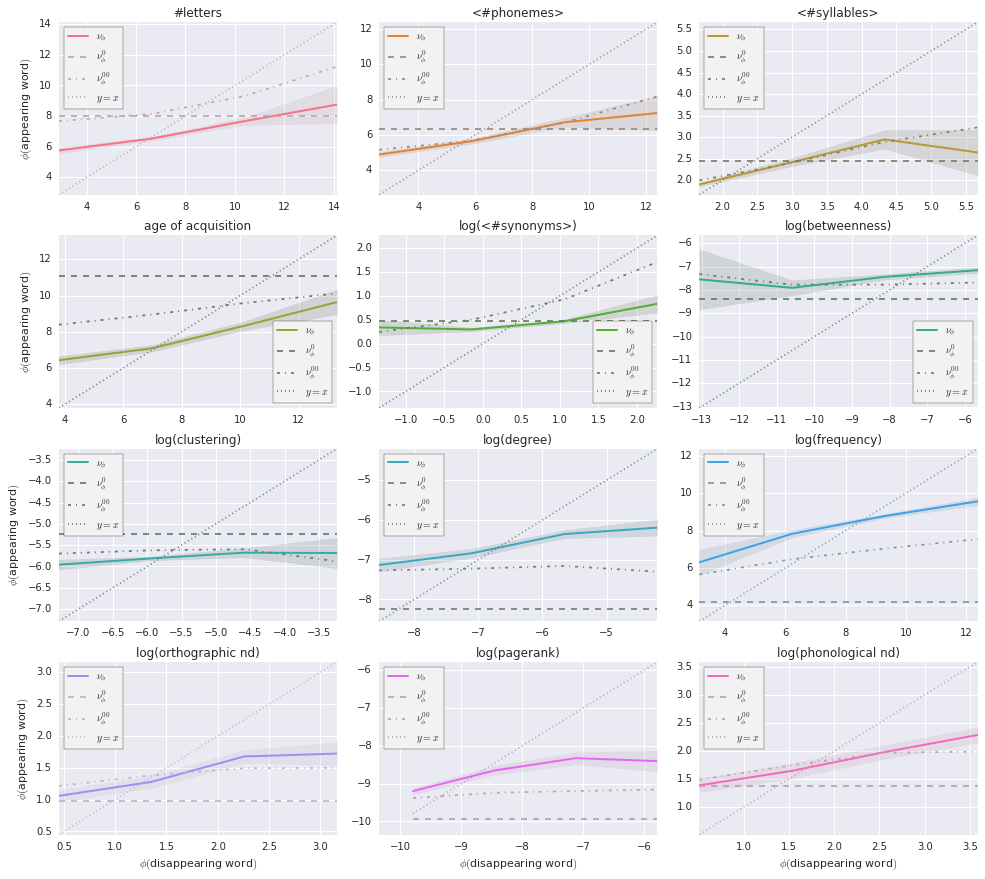

In [11]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

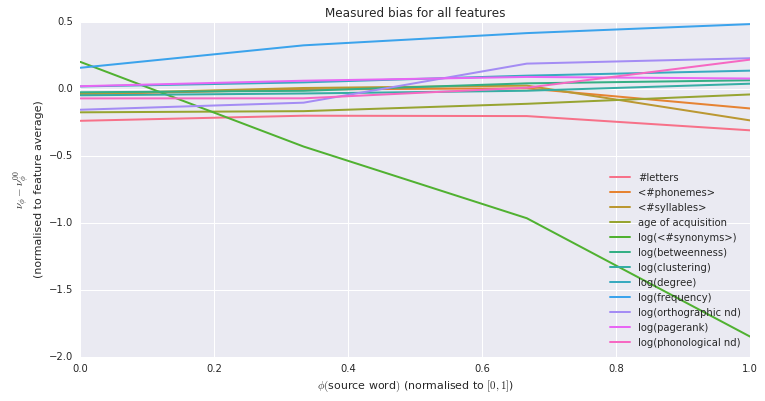

In [12]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | ns. | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *   | ns. |


H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | ns. | *** |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *** | *   | *** | *   |


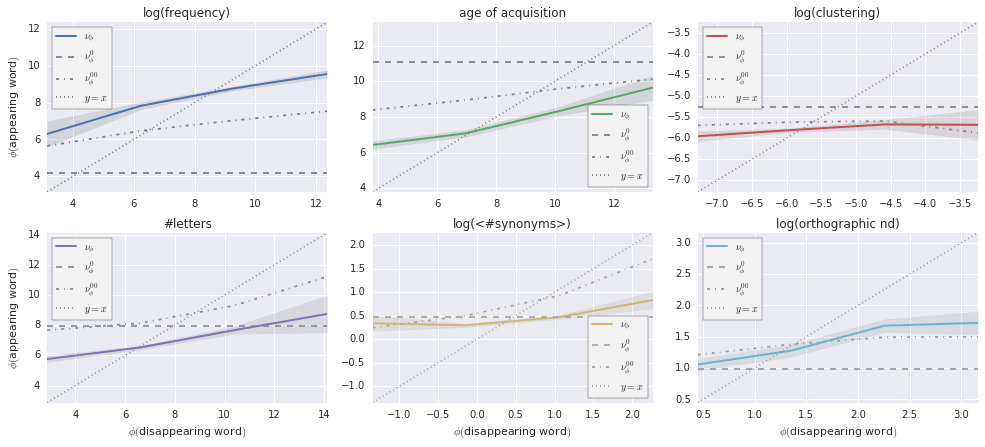

In [13]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

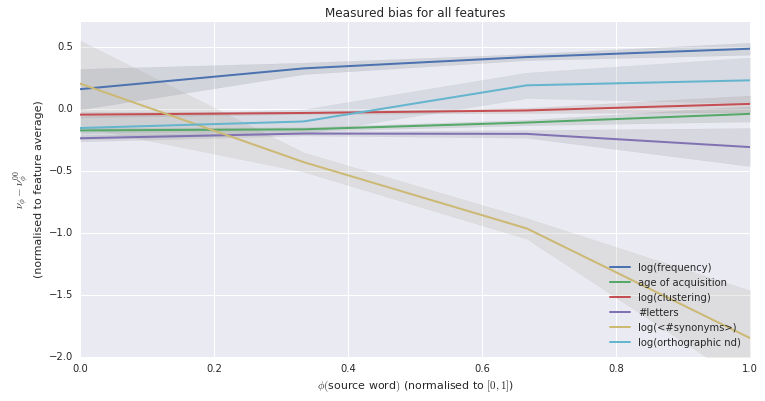

In [14]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)')\
    .set_ylim(-2, .7);

#### 2.1.2 Quantiles of distribution of appeared global feature values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |
------------------
H_0  | *** | ns. |
H_00 | *** | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *   |
H_00 | *   | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *   |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | **  | ns. | ns. | *** |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | ns. | ns. | *** |


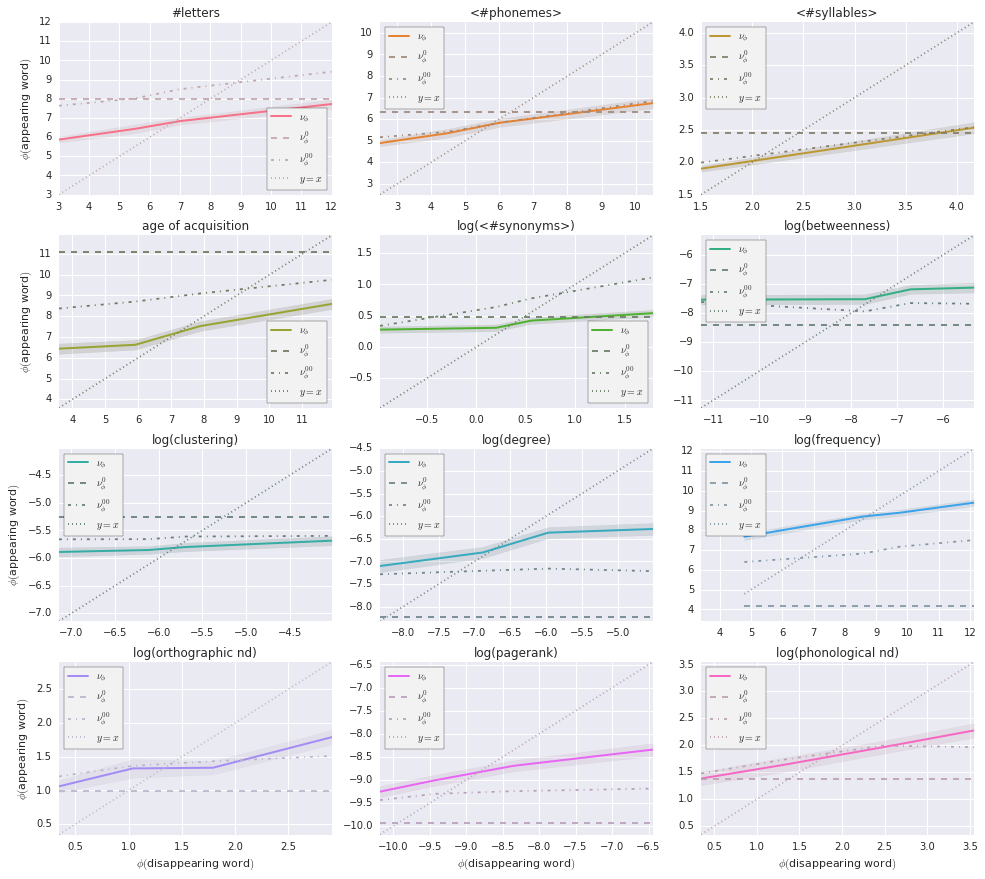

In [15]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

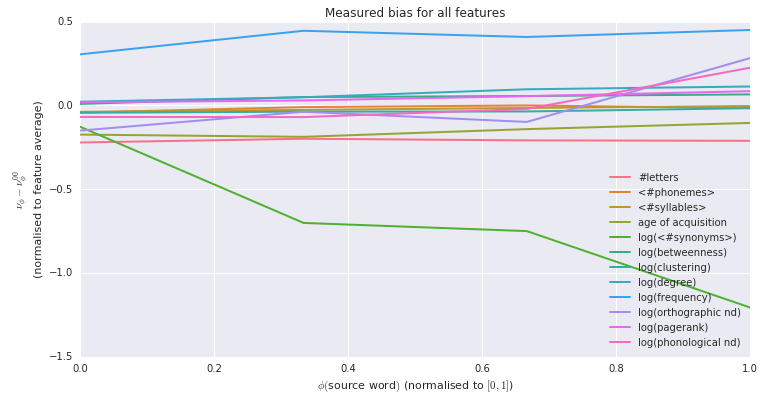

In [16]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *   |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |


H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *   |
H_00 | *   | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | **  | ns. | ns. | *** |


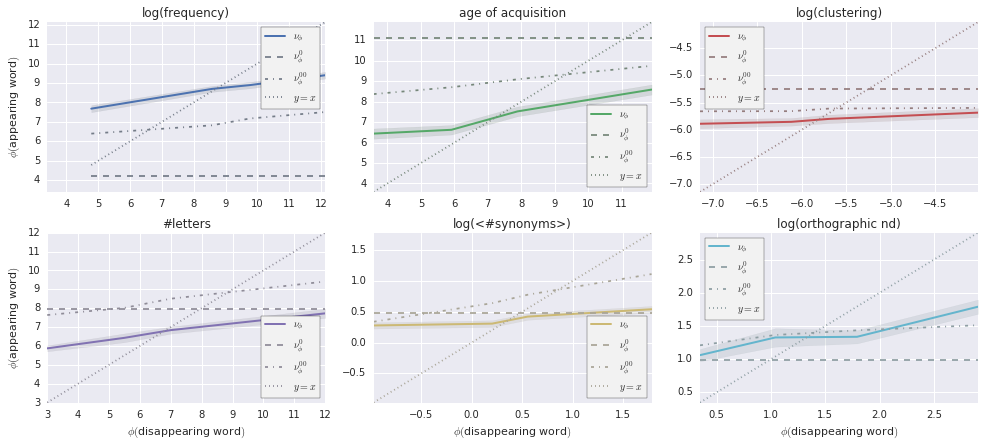

In [17]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

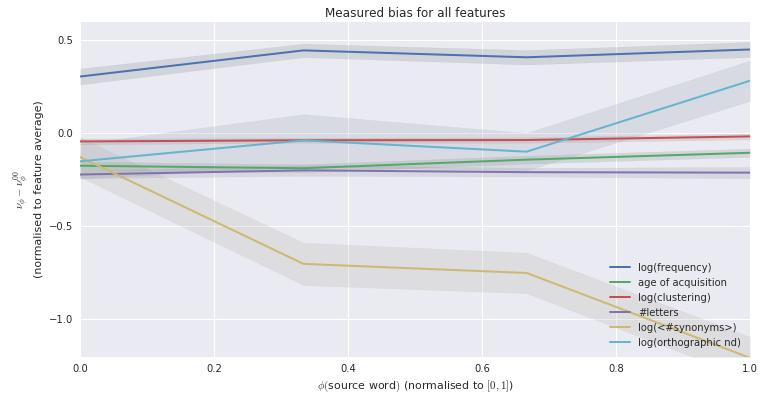

In [18]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'quantiles': True})\
    .set_ylim(-1.2, .6);

### 2.2 Sentence-relative feature values

#### 2.2.1 Bins of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | ns. |
H_00 | **  | ns. | ns. | **  |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | **  | ns. |
H_00 | ns. | *** | ns. | *   |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | **  |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | ns. |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | ns. | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | **  | *** | *** | ns. |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | **  | ns. | ns. |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *   | *** | *** |
H_00 | ns. | *** | ns. | *   |


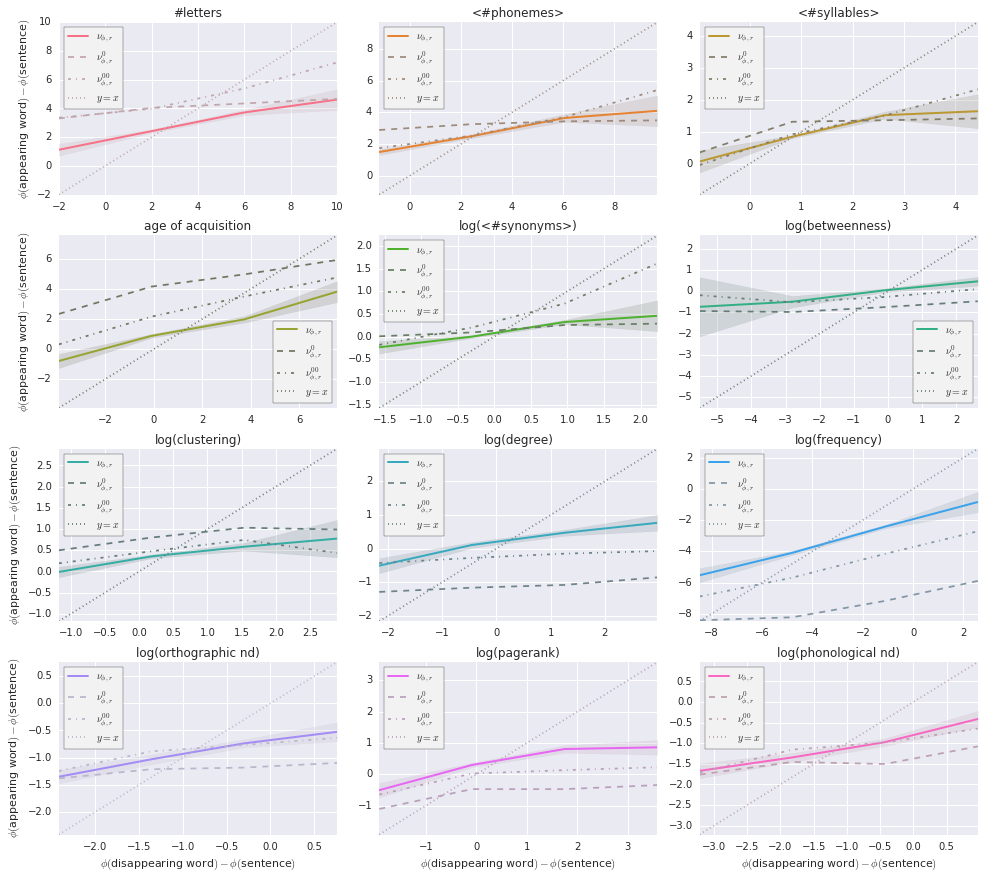

In [19]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

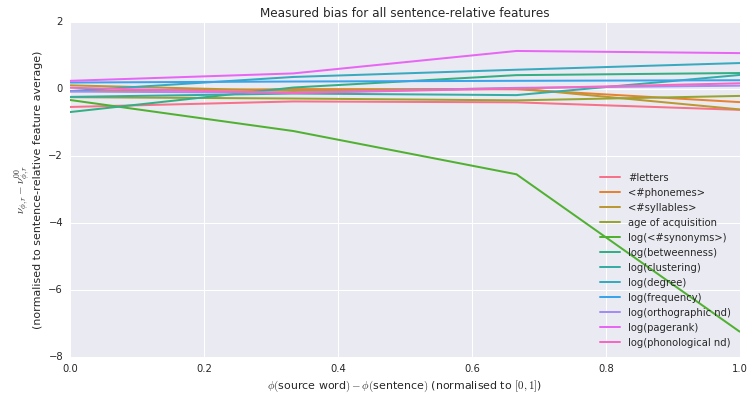

In [20]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | **  |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | **  | *** | *** | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |


H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | ns. |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | **  | ns. | ns. |


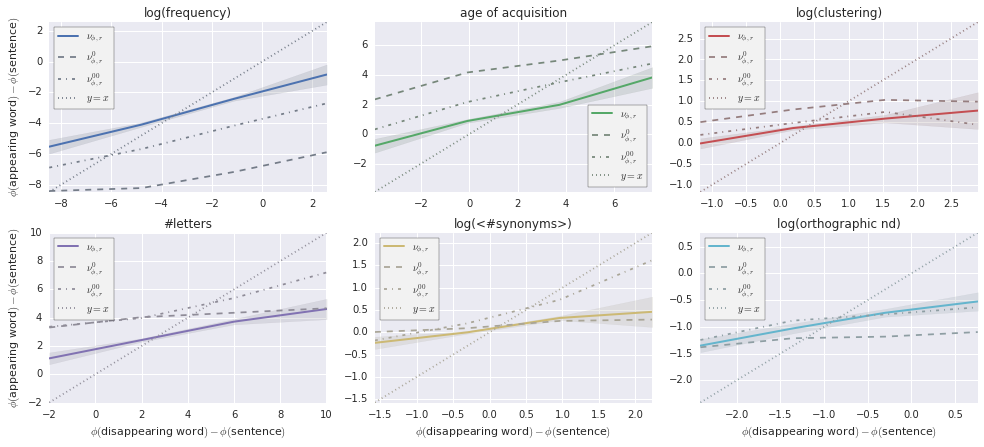

In [21]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

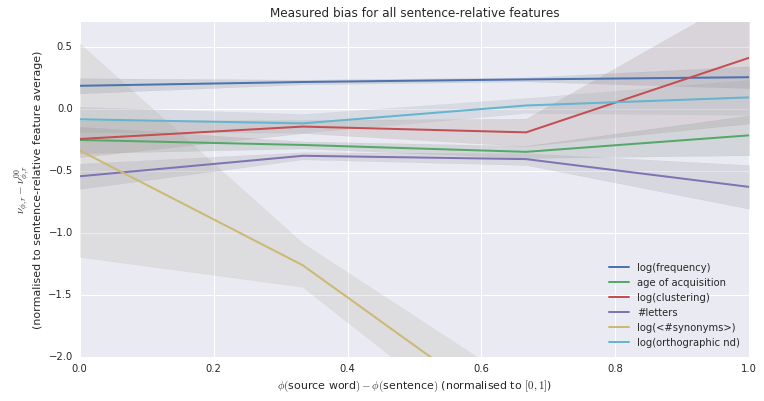

In [22]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_sentencerel',
             'deep', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True})\
    .set_ylim(-2, .7);

#### 2.2.2 Quantiles of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | **  | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | **  |
H_00 | **  | ns. | ns. | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *   | **  |
H_00 | *** | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | **  | ns. | *** |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *   | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |


H_00 | ns. | **  | ns. | **  |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *   | *** | *** |
H_00 | ns. | *** | ns. | *   |


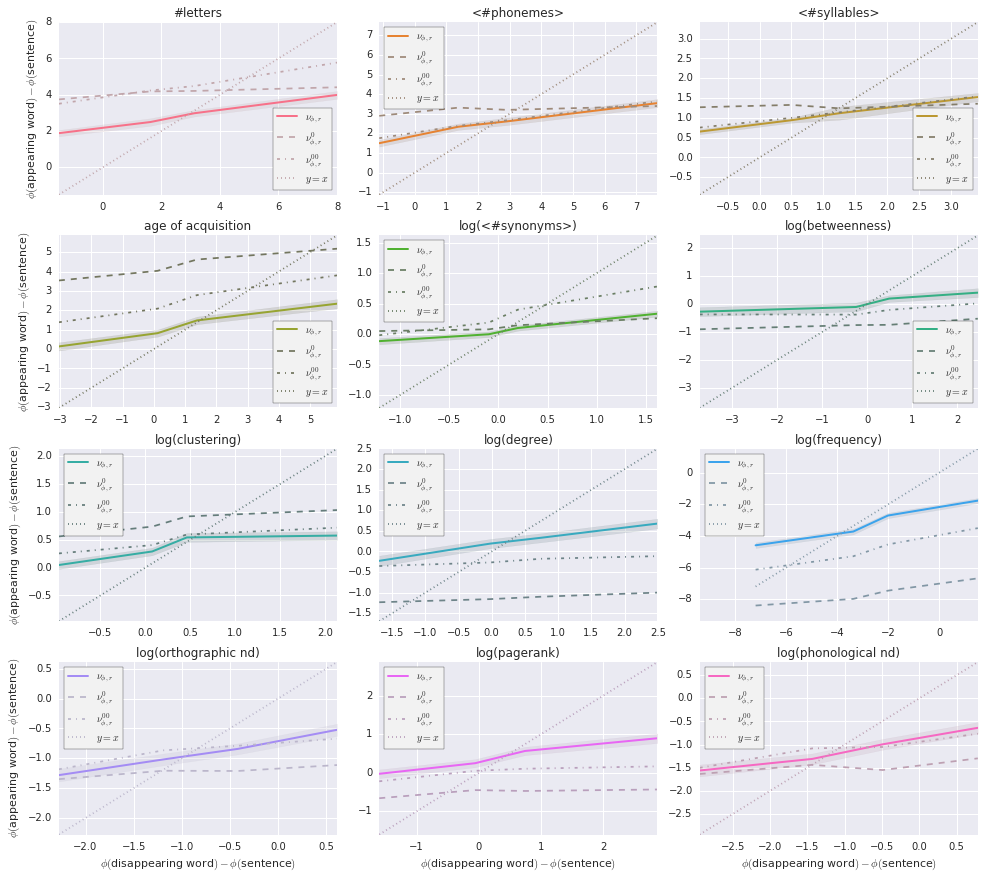

In [23]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

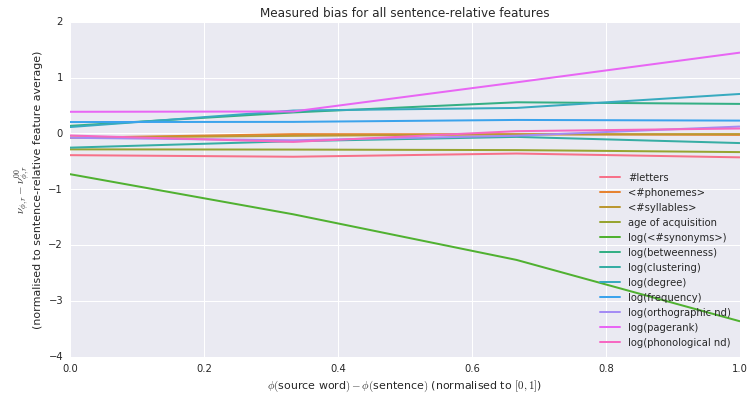

In [24]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | **  | ns. | *** |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *   | **  |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | **  | ns. | **  |


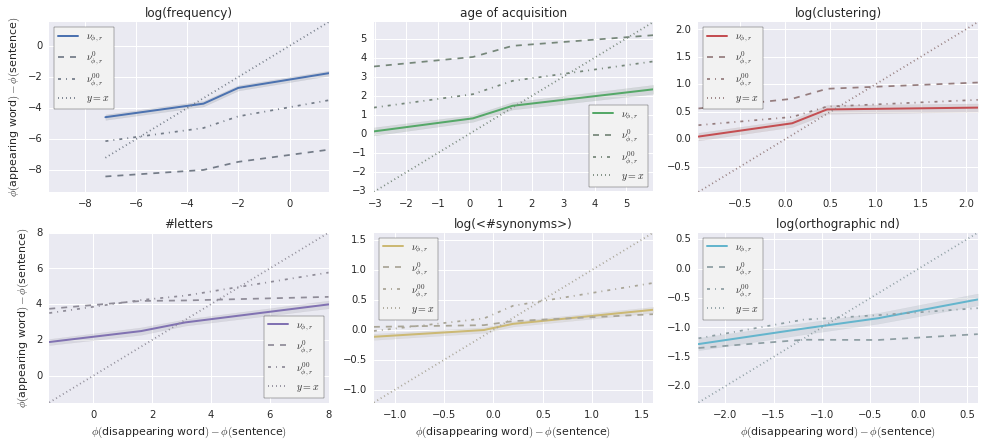

In [25]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

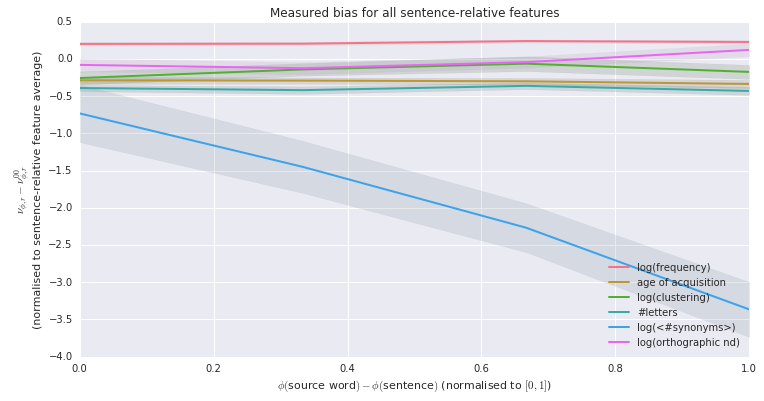

In [26]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True, 'quantiles': True});

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [27]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count,
                               right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count,
                               right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (
                dest[(x_bins == x) & (y_bins == y)] -
                source[(x_bins == x) & (y_bins == y)]
            ).mean()
            v_values[y, x] = (
                dest_rel[(x_bins == x) & (y_bins == y)] -
                source_rel[(x_bins == x) & (y_bins == y)]
            ).mean()
            strength[y, x] = np.sqrt(
                (dest[(x_bins == x) & (y_bins == y)] - 
                 source[(x_bins == x) & (y_bins == y)]) ** 2 +
                (dest_rel[(x_bins == x) & (y_bins == y)] - 
                 source_rel[(x_bins == x) & (y_bins == y)]) ** 2
            ).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), 
             label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


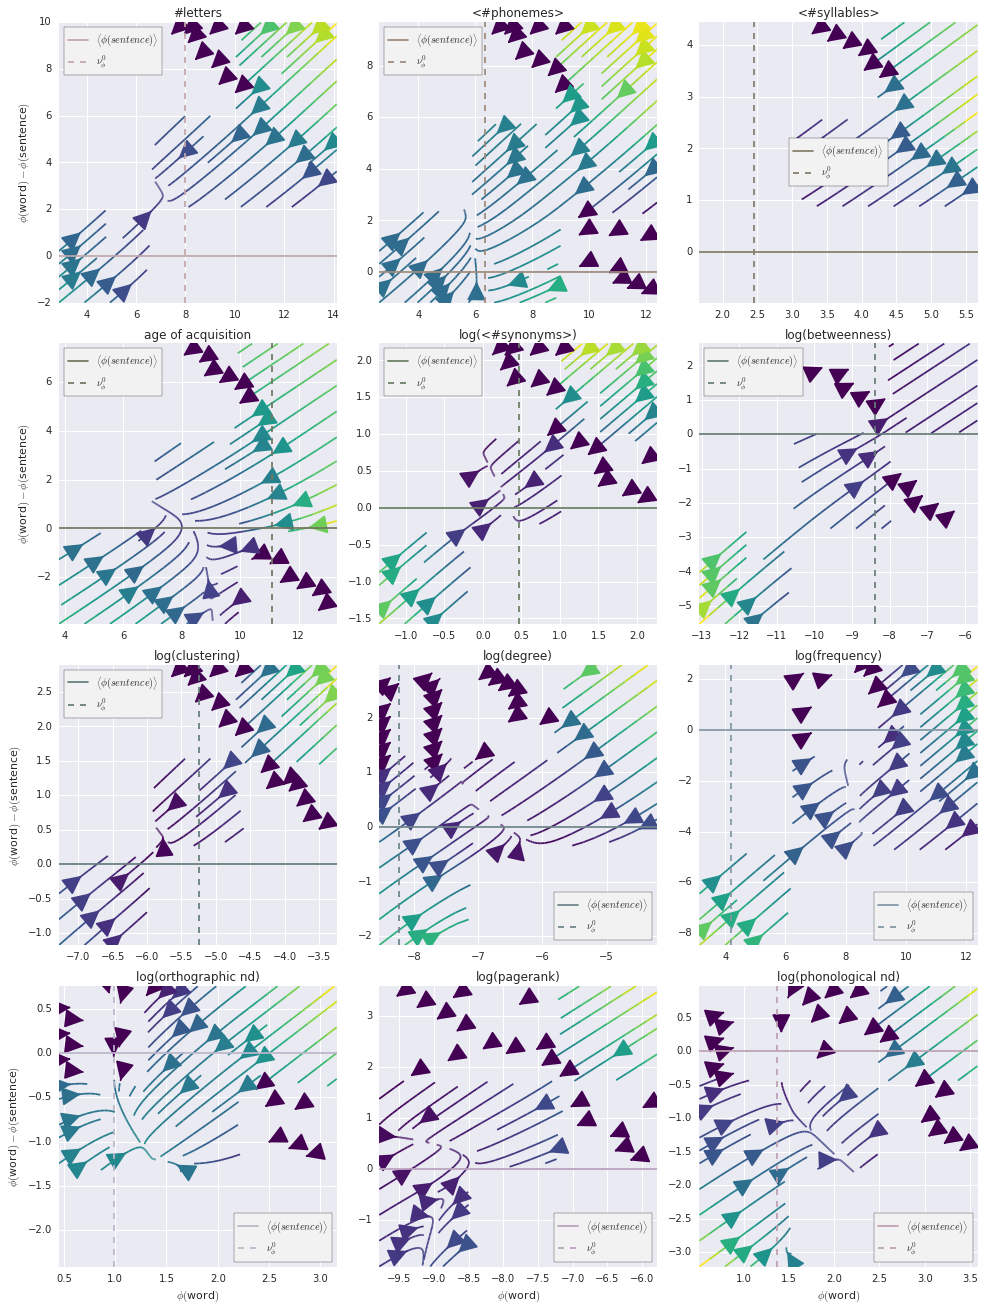

In [28]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


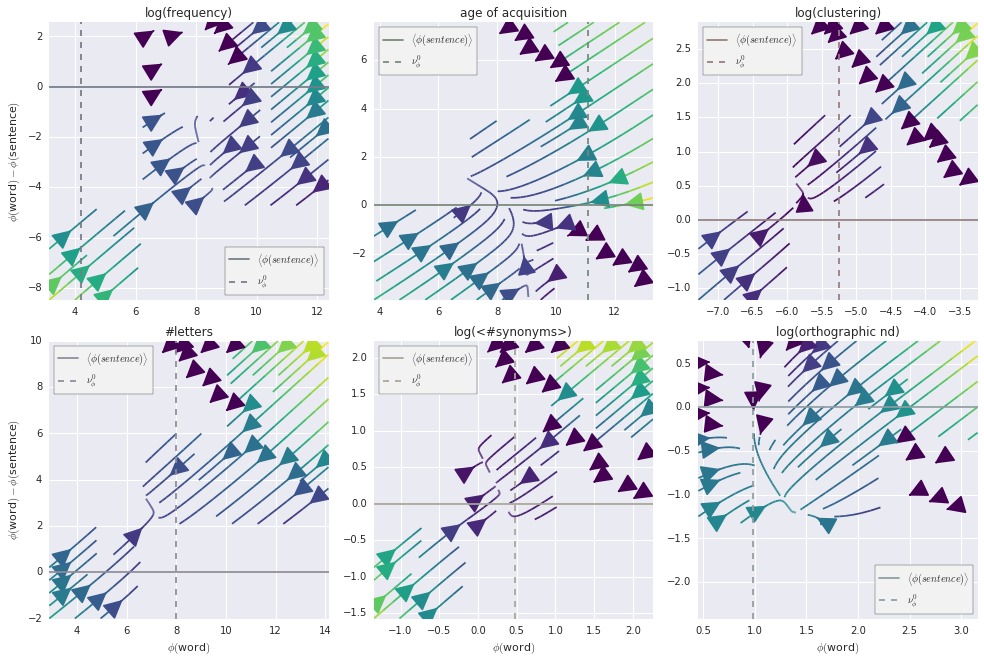

In [29]:
g = sb.FacetGrid(data=variations[variations['feature']
                                 .map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account, changing the values under the null hypotheses.

### 4.1 On all the features

Compute the actual PCA

In [30]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id',
                                 columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:"
      .format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.54452287  0.16544799  0.07839186  0.07265262  0.03478348  0.03030432
  0.0186419   0.01809321  0.01630228  0.00879147]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.455705,0.273060,-0.084683,0.238851,0.221072,-0.442019,0.217481,0.275208,-0.425249,0.279935,-0.164213,0.009609
Component-1,0.311235,-0.409973,0.156801,-0.307205,-0.267830,-0.423266,0.168247,-0.309101,-0.415777,0.206097,-0.161128,0.006865
Component-2,0.809499,0.452996,-0.138917,0.180863,0.180592,-0.096544,0.024420,0.132951,-0.067832,0.131008,-0.005658,-0.074125


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [31]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution\
                .components(component, pca, pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (   0 of 4941) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (  21 of 4941) |                       | Elapsed Time: 0:00:42 ETA: 2:45:11

  0% (  46 of 4941) |                       | Elapsed Time: 0:00:42 ETA: 1:15:24

  1% (  77 of 4941) |                       | Elapsed Time: 0:00:42 ETA: 0:45:01

  2% ( 103 of 4941) |                       | Elapsed Time: 0:00:42 ETA: 0:33:38

  2% ( 138 of 4941) |                       | Elapsed Time: 0:00:43 ETA: 0:00:38

  3% ( 166 of 4941) |                       | Elapsed Time: 0:00:43 ETA: 0:00:36

  4% ( 199 of 4941) |                       | Elapsed Time: 0:00:43 ETA: 0:00:36

  4% ( 225 of 4941) |#                      | Elapsed Time: 0:00:43 ETA: 0:00:36

  5% ( 260 of 4941) |#                      | Elapsed Time: 0:00:44 ETA: 0:00:36

  5% ( 275 of 4941) |#                      | Elapsed Time: 0:00:44 ETA: 0:00:40

  5% ( 294 of 4941) |#                      | Elapsed Time: 0:00:44 ETA: 0:00:44

  6% ( 321 of 4941) |#                      | Elapsed Time: 0:00:44 ETA: 0:00:44

  7% ( 346 of 4941) |#                      | Elapsed Time: 0:00:45 ETA: 0:00:46

  7% ( 383 of 4941) |#                      | Elapsed Time: 0:00:45 ETA: 0:00:42

  8% ( 409 of 4941) |#                      | Elapsed Time: 0:00:45 ETA: 0:00:39

  8% ( 433 of 4941) |##                     | Elapsed Time: 0:00:45 ETA: 0:00:37

  9% ( 457 of 4941) |##                     | Elapsed Time: 0:00:46 ETA: 0:00:37

  9% ( 484 of 4941) |##                     | Elapsed Time: 0:00:46 ETA: 0:00:37

 10% ( 506 of 4941) |##                     | Elapsed Time: 0:00:46 ETA: 0:00:38

 10% ( 525 of 4941) |##                     | Elapsed Time: 0:00:46 ETA: 0:00:40

 11% ( 556 of 4941) |##                     | Elapsed Time: 0:00:46 ETA: 0:00:39

 11% ( 584 of 4941) |##                     | Elapsed Time: 0:00:47 ETA: 0:00:37

 12% ( 618 of 4941) |##                     | Elapsed Time: 0:00:47 ETA: 0:00:36

 12% ( 641 of 4941) |##                     | Elapsed Time: 0:00:47 ETA: 0:00:36

 13% ( 680 of 4941) |###                    | Elapsed Time: 0:00:47 ETA: 0:00:32

 14% ( 713 of 4941) |###                    | Elapsed Time: 0:00:48 ETA: 0:00:31

 15% ( 742 of 4941) |###                    | Elapsed Time: 0:00:48 ETA: 0:00:32

 15% ( 771 of 4941) |###                    | Elapsed Time: 0:00:48 ETA: 0:00:30

 16% ( 803 of 4941) |###                    | Elapsed Time: 0:00:48 ETA: 0:00:30

 16% ( 835 of 4941) |###                    | Elapsed Time: 0:00:48 ETA: 0:00:29

 17% ( 853 of 4941) |###                    | Elapsed Time: 0:00:49 ETA: 0:00:32

 17% ( 880 of 4941) |####                   | Elapsed Time: 0:00:49 ETA: 0:00:32

 18% ( 906 of 4941) |####                   | Elapsed Time: 0:00:49 ETA: 0:00:32

 19% ( 939 of 4941) |####                   | Elapsed Time: 0:00:49 ETA: 0:00:33

 19% ( 964 of 4941) |####                   | Elapsed Time: 0:00:50 ETA: 0:00:33

 20% ( 989 of 4941) |####                   | Elapsed Time: 0:00:50 ETA: 0:00:33

 20% (1015 of 4941) |####                   | Elapsed Time: 0:00:50 ETA: 0:00:32

 21% (1050 of 4941) |####                   | Elapsed Time: 0:00:50 ETA: 0:00:31

 21% (1079 of 4941) |#####                  | Elapsed Time: 0:00:50 ETA: 0:00:30

 22% (1112 of 4941) |#####                  | Elapsed Time: 0:00:51 ETA: 0:00:29

 23% (1138 of 4941) |#####                  | Elapsed Time: 0:00:51 ETA: 0:00:28

 23% (1174 of 4941) |#####                  | Elapsed Time: 0:00:51 ETA: 0:00:28

 24% (1201 of 4941) |#####                  | Elapsed Time: 0:00:51 ETA: 0:00:29

 25% (1236 of 4941) |#####                  | Elapsed Time: 0:00:52 ETA: 0:00:28

 25% (1266 of 4941) |#####                  | Elapsed Time: 0:00:52 ETA: 0:00:27

 26% (1298 of 4941) |######                 | Elapsed Time: 0:00:52 ETA: 0:00:27

 26% (1321 of 4941) |######                 | Elapsed Time: 0:00:52 ETA: 0:00:28

 27% (1345 of 4941) |######                 | Elapsed Time: 0:00:53 ETA: 0:00:28

 27% (1367 of 4941) |######                 | Elapsed Time: 0:00:53 ETA: 0:00:31

 28% (1393 of 4941) |######                 | Elapsed Time: 0:00:53 ETA: 0:00:32

 28% (1421 of 4941) |######                 | Elapsed Time: 0:00:53 ETA: 0:00:30

 29% (1446 of 4941) |######                 | Elapsed Time: 0:00:53 ETA: 0:00:30

 30% (1483 of 4941) |######                 | Elapsed Time: 0:00:54 ETA: 0:00:29

 30% (1508 of 4941) |#######                | Elapsed Time: 0:00:54 ETA: 0:00:27

 31% (1545 of 4941) |#######                | Elapsed Time: 0:00:54 ETA: 0:00:27

 31% (1570 of 4941) |#######                | Elapsed Time: 0:00:54 ETA: 0:00:27

 32% (1606 of 4941) |#######                | Elapsed Time: 0:00:55 ETA: 0:00:27

 33% (1633 of 4941) |#######                | Elapsed Time: 0:00:55 ETA: 0:00:26

 33% (1668 of 4941) |#######                | Elapsed Time: 0:00:55 ETA: 0:00:26

 34% (1694 of 4941) |#######                | Elapsed Time: 0:00:55 ETA: 0:00:26

 35% (1730 of 4941) |########               | Elapsed Time: 0:00:56 ETA: 0:00:26

 35% (1756 of 4941) |########               | Elapsed Time: 0:00:56 ETA: 0:00:25

 36% (1792 of 4941) |########               | Elapsed Time: 0:00:56 ETA: 0:00:25

 36% (1818 of 4941) |########               | Elapsed Time: 0:00:56 ETA: 0:00:25

 37% (1842 of 4941) |########               | Elapsed Time: 0:00:57 ETA: 0:00:24

 37% (1867 of 4941) |########               | Elapsed Time: 0:00:57 ETA: 0:00:25

 38% (1891 of 4941) |########               | Elapsed Time: 0:00:57 ETA: 0:00:25

 38% (1915 of 4941) |########               | Elapsed Time: 0:00:57 ETA: 0:00:25

 39% (1942 of 4941) |#########              | Elapsed Time: 0:00:58 ETA: 0:00:25

 40% (1977 of 4941) |#########              | Elapsed Time: 0:00:58 ETA: 0:00:23

 40% (2002 of 4941) |#########              | Elapsed Time: 0:00:58 ETA: 0:00:24

 41% (2026 of 4941) |#########              | Elapsed Time: 0:00:58 ETA: 0:00:23

 41% (2055 of 4941) |#########              | Elapsed Time: 0:00:58 ETA: 0:00:22

 42% (2081 of 4941) |#########              | Elapsed Time: 0:00:59 ETA: 0:00:22

 42% (2112 of 4941) |#########              | Elapsed Time: 0:00:59 ETA: 0:00:22

 43% (2139 of 4941) |#########              | Elapsed Time: 0:00:59 ETA: 0:00:21

 44% (2175 of 4941) |##########             | Elapsed Time: 0:00:59 ETA: 0:00:20

 44% (2201 of 4941) |##########             | Elapsed Time: 0:01:00 ETA: 0:00:21

 45% (2236 of 4941) |##########             | Elapsed Time: 0:01:00 ETA: 0:00:21

 45% (2261 of 4941) |##########             | Elapsed Time: 0:01:00 ETA: 0:00:21

 46% (2286 of 4941) |##########             | Elapsed Time: 0:01:00 ETA: 0:00:21

 46% (2312 of 4941) |##########             | Elapsed Time: 0:01:00 ETA: 0:00:21

 47% (2347 of 4941) |##########             | Elapsed Time: 0:01:01 ETA: 0:00:20

 48% (2372 of 4941) |###########            | Elapsed Time: 0:01:01 ETA: 0:00:20

 48% (2409 of 4941) |###########            | Elapsed Time: 0:01:01 ETA: 0:00:19

 49% (2434 of 4941) |###########            | Elapsed Time: 0:01:01 ETA: 0:00:19

 50% (2471 of 4941) |###########            | Elapsed Time: 0:01:02 ETA: 0:00:19

 50% (2499 of 4941) |###########            | Elapsed Time: 0:01:02 ETA: 0:00:19

 51% (2533 of 4941) |###########            | Elapsed Time: 0:01:02 ETA: 0:00:18

 51% (2569 of 4941) |###########            | Elapsed Time: 0:01:02 ETA: 0:00:18

 52% (2610 of 4941) |############           | Elapsed Time: 0:01:03 ETA: 0:00:17

 53% (2633 of 4941) |############           | Elapsed Time: 0:01:03 ETA: 0:00:18

 54% (2670 of 4941) |############           | Elapsed Time: 0:01:03 ETA: 0:00:17

 54% (2699 of 4941) |############           | Elapsed Time: 0:01:03 ETA: 0:00:17

 55% (2732 of 4941) |############           | Elapsed Time: 0:01:04 ETA: 0:00:17

 55% (2758 of 4941) |############           | Elapsed Time: 0:01:04 ETA: 0:00:17

 56% (2780 of 4941) |############           | Elapsed Time: 0:01:04 ETA: 0:00:17

 56% (2803 of 4941) |#############          | Elapsed Time: 0:01:04 ETA: 0:00:18

 57% (2842 of 4941) |#############          | Elapsed Time: 0:01:05 ETA: 0:00:17

 57% (2865 of 4941) |#############          | Elapsed Time: 0:01:05 ETA: 0:00:17

 58% (2903 of 4941) |#############          | Elapsed Time: 0:01:05 ETA: 0:00:17

 59% (2925 of 4941) |#############          | Elapsed Time: 0:01:05 ETA: 0:00:16

 59% (2952 of 4941) |#############          | Elapsed Time: 0:01:06 ETA: 0:00:16

 60% (2977 of 4941) |#############          | Elapsed Time: 0:01:06 ETA: 0:00:16

 60% (3004 of 4941) |#############          | Elapsed Time: 0:01:06 ETA: 0:00:15

 61% (3041 of 4941) |##############         | Elapsed Time: 0:01:06 ETA: 0:00:14

 62% (3065 of 4941) |##############         | Elapsed Time: 0:01:07 ETA: 0:00:15

 62% (3089 of 4941) |##############         | Elapsed Time: 0:01:07 ETA: 0:00:15

 62% (3112 of 4941) |##############         | Elapsed Time: 0:01:07 ETA: 0:00:15

 63% (3150 of 4941) |##############         | Elapsed Time: 0:01:07 ETA: 0:00:15

 64% (3176 of 4941) |##############         | Elapsed Time: 0:01:07 ETA: 0:00:14

 64% (3200 of 4941) |##############         | Elapsed Time: 0:01:08 ETA: 0:00:14

 65% (3225 of 4941) |###############        | Elapsed Time: 0:01:08 ETA: 0:00:14

 65% (3251 of 4941) |###############        | Elapsed Time: 0:01:08 ETA: 0:00:13

 66% (3286 of 4941) |###############        | Elapsed Time: 0:01:08 ETA: 0:00:13

 67% (3314 of 4941) |###############        | Elapsed Time: 0:01:09 ETA: 0:00:13

 67% (3349 of 4941) |###############        | Elapsed Time: 0:01:09 ETA: 0:00:12

 68% (3380 of 4941) |###############        | Elapsed Time: 0:01:09 ETA: 0:00:11

 69% (3410 of 4941) |###############        | Elapsed Time: 0:01:09 ETA: 0:00:11

 69% (3435 of 4941) |###############        | Elapsed Time: 0:01:09 ETA: 0:00:11

 70% (3473 of 4941) |################       | Elapsed Time: 0:01:10 ETA: 0:00:11

 70% (3501 of 4941) |################       | Elapsed Time: 0:01:10 ETA: 0:00:11

 71% (3534 of 4941) |################       | Elapsed Time: 0:01:10 ETA: 0:00:11

 72% (3559 of 4941) |################       | Elapsed Time: 0:01:10 ETA: 0:00:10

 72% (3594 of 4941) |################       | Elapsed Time: 0:01:11 ETA: 0:00:10

 73% (3623 of 4941) |################       | Elapsed Time: 0:01:11 ETA: 0:00:10

 74% (3658 of 4941) |#################      | Elapsed Time: 0:01:11 ETA: 0:00:10

 74% (3682 of 4941) |#################      | Elapsed Time: 0:01:11 ETA: 0:00:09

 75% (3706 of 4941) |#################      | Elapsed Time: 0:01:12 ETA: 0:00:10

 75% (3734 of 4941) |#################      | Elapsed Time: 0:01:12 ETA: 0:00:09

 76% (3768 of 4941) |#################      | Elapsed Time: 0:01:12 ETA: 0:00:09

 76% (3795 of 4941) |#################      | Elapsed Time: 0:01:12 ETA: 0:00:09

 77% (3830 of 4941) |#################      | Elapsed Time: 0:01:13 ETA: 0:00:08

 78% (3855 of 4941) |#################      | Elapsed Time: 0:01:13 ETA: 0:00:08

 78% (3878 of 4941) |##################     | Elapsed Time: 0:01:13 ETA: 0:00:08

 78% (3903 of 4941) |##################     | Elapsed Time: 0:01:13 ETA: 0:00:08

 79% (3928 of 4941) |##################     | Elapsed Time: 0:01:13 ETA: 0:00:08

 80% (3966 of 4941) |##################     | Elapsed Time: 0:01:14 ETA: 0:00:08

 80% (3995 of 4941) |##################     | Elapsed Time: 0:01:14 ETA: 0:00:07

 81% (4026 of 4941) |##################     | Elapsed Time: 0:01:14 ETA: 0:00:07

 81% (4051 of 4941) |##################     | Elapsed Time: 0:01:14 ETA: 0:00:07

 82% (4092 of 4941) |###################    | Elapsed Time: 0:01:15 ETA: 0:00:06

 83% (4118 of 4941) |###################    | Elapsed Time: 0:01:15 ETA: 0:00:06

 84% (4153 of 4941) |###################    | Elapsed Time: 0:01:15 ETA: 0:00:06

 84% (4177 of 4941) |###################    | Elapsed Time: 0:01:15 ETA: 0:00:05

 85% (4214 of 4941) |###################    | Elapsed Time: 0:01:16 ETA: 0:00:05

 85% (4241 of 4941) |###################    | Elapsed Time: 0:01:16 ETA: 0:00:05

 86% (4274 of 4941) |###################    | Elapsed Time: 0:01:16 ETA: 0:00:05

 87% (4300 of 4941) |####################   | Elapsed Time: 0:01:16 ETA: 0:00:05

 87% (4338 of 4941) |####################   | Elapsed Time: 0:01:17 ETA: 0:00:04

 88% (4361 of 4941) |####################   | Elapsed Time: 0:01:17 ETA: 0:00:04

 88% (4386 of 4941) |####################   | Elapsed Time: 0:01:17 ETA: 0:00:04

 89% (4410 of 4941) |####################   | Elapsed Time: 0:01:17 ETA: 0:00:04

 90% (4447 of 4941) |####################   | Elapsed Time: 0:01:18 ETA: 0:00:04

 90% (4471 of 4941) |####################   | Elapsed Time: 0:01:18 ETA: 0:00:03

 90% (4493 of 4941) |####################   | Elapsed Time: 0:01:18 ETA: 0:00:03

 91% (4521 of 4941) |#####################  | Elapsed Time: 0:01:18 ETA: 0:00:03

 92% (4549 of 4941) |#####################  | Elapsed Time: 0:01:18 ETA: 0:00:03

 92% (4586 of 4941) |#####################  | Elapsed Time: 0:01:19 ETA: 0:00:03

 93% (4614 of 4941) |#####################  | Elapsed Time: 0:01:19 ETA: 0:00:02

 94% (4648 of 4941) |#####################  | Elapsed Time: 0:01:19 ETA: 0:00:02

 94% (4674 of 4941) |#####################  | Elapsed Time: 0:01:19 ETA: 0:00:02

 95% (4705 of 4941) |#####################  | Elapsed Time: 0:01:20 ETA: 0:00:01

 95% (4728 of 4941) |###################### | Elapsed Time: 0:01:20 ETA: 0:00:01

 96% (4756 of 4941) |###################### | Elapsed Time: 0:01:20 ETA: 0:00:01

 96% (4783 of 4941) |###################### | Elapsed Time: 0:01:20 ETA: 0:00:01

 97% (4818 of 4941) |###################### | Elapsed Time: 0:01:21 ETA: 0:00:00

 98% (4844 of 4941) |###################### | Elapsed Time: 0:01:21 ETA: 0:00:00

 98% (4880 of 4941) |###################### | Elapsed Time: 0:01:21 ETA: 0:00:00

 99% (4905 of 4941) |###################### | Elapsed Time: 0:01:21 ETA: 0:00:00

100% (4941 of 4941) |######################| Elapsed Time: 0:01:22 Time: 0:01:22


Compute cluster averages (so as not to overestimate confidence intervals).

In [32]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | ns. | ns. | **  | *** |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | ns. |

---
2.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | ns. |


H_00 | ns. | ns. | ns. | ns. |


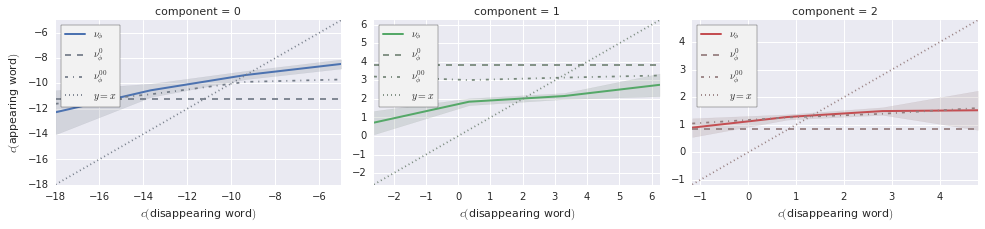

In [33]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On a subset of relevant features

In [34]:
relevant_features = ['frequency', 'aoa', 'letters_count']

Compute the actual PCA

In [35]:
# Compute the PCA.
pcafeatures = tuple(sorted(relevant_features))
pcavariations = variations[variations['feature']
                           .map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

pd.DataFrame(pca.components_,
             columns=pcafeatures,
             index=['Component-{}'.format(i)
                    for i in range(pca.n_components_)])

MLE estimates there are 2 components.

Those explain the following variance:
[ 0.6886474   0.18007583]



,aoa,frequency,letters_count
Component-0,-0.738795,0.383435,-0.554220
Component-1,0.405921,-0.403283,-0.820116


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [36]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(pca.n_components_):
            source, destination = substitution.components(component, pca,
                                                          pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (   0 of 4941) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (  17 of 4941) |                       | Elapsed Time: 0:00:03 ETA: 0:14:42

  1% (  62 of 4941) |                       | Elapsed Time: 0:00:03 ETA: 0:04:59

  1% (  97 of 4941) |                       | Elapsed Time: 0:00:03 ETA: 0:02:55

  2% ( 142 of 4941) |                       | Elapsed Time: 0:00:03 ETA: 0:02:07

  3% ( 186 of 4941) |                       | Elapsed Time: 0:00:04 ETA: 0:00:27

  4% ( 221 of 4941) |#                      | Elapsed Time: 0:00:04 ETA: 0:00:27

  5% ( 264 of 4941) |#                      | Elapsed Time: 0:00:04 ETA: 0:00:27

  5% ( 291 of 4941) |#                      | Elapsed Time: 0:00:04 ETA: 0:00:28

  6% ( 327 of 4941) |#                      | Elapsed Time: 0:00:04 ETA: 0:00:28

  7% ( 371 of 4941) |#                      | Elapsed Time: 0:00:05 ETA: 0:00:28

  8% ( 406 of 4941) |#                      | Elapsed Time: 0:00:05 ETA: 0:00:28

  9% ( 451 of 4941) |##                     | Elapsed Time: 0:00:05 ETA: 0:00:27

 10% ( 495 of 4941) |##                     | Elapsed Time: 0:00:05 ETA: 0:00:25

 10% ( 525 of 4941) |##                     | Elapsed Time: 0:00:06 ETA: 0:00:26

 11% ( 574 of 4941) |##                     | Elapsed Time: 0:00:06 ETA: 0:00:26

 12% ( 618 of 4941) |##                     | Elapsed Time: 0:00:06 ETA: 0:00:26

 13% ( 651 of 4941) |###                    | Elapsed Time: 0:00:06 ETA: 0:00:26

 14% ( 700 of 4941) |###                    | Elapsed Time: 0:00:07 ETA: 0:00:25

 15% ( 742 of 4941) |###                    | Elapsed Time: 0:00:07 ETA: 0:00:23

 15% ( 780 of 4941) |###                    | Elapsed Time: 0:00:07 ETA: 0:00:23

 16% ( 824 of 4941) |###                    | Elapsed Time: 0:00:07 ETA: 0:00:22

 17% ( 865 of 4941) |####                   | Elapsed Time: 0:00:08 ETA: 0:00:23

 18% ( 900 of 4941) |####                   | Elapsed Time: 0:00:08 ETA: 0:00:23

 19% ( 943 of 4941) |####                   | Elapsed Time: 0:00:08 ETA: 0:00:23

 20% ( 989 of 4941) |####                   | Elapsed Time: 0:00:08 ETA: 0:00:23

 20% (1025 of 4941) |####                   | Elapsed Time: 0:00:09 ETA: 0:00:24

 21% (1068 of 4941) |####                   | Elapsed Time: 0:00:09 ETA: 0:00:23

 22% (1112 of 4941) |#####                  | Elapsed Time: 0:00:09 ETA: 0:00:23

 23% (1146 of 4941) |#####                  | Elapsed Time: 0:00:09 ETA: 0:00:22

 24% (1192 of 4941) |#####                  | Elapsed Time: 0:00:10 ETA: 0:00:21

 25% (1236 of 4941) |#####                  | Elapsed Time: 0:00:10 ETA: 0:00:21

 25% (1272 of 4941) |#####                  | Elapsed Time: 0:00:10 ETA: 0:00:21

 26% (1314 of 4941) |######                 | Elapsed Time: 0:00:10 ETA: 0:00:21

 27% (1359 of 4941) |######                 | Elapsed Time: 0:00:11 ETA: 0:00:21

 28% (1390 of 4941) |######                 | Elapsed Time: 0:00:11 ETA: 0:00:22

 29% (1438 of 4941) |######                 | Elapsed Time: 0:00:11 ETA: 0:00:21

 30% (1483 of 4941) |######                 | Elapsed Time: 0:00:11 ETA: 0:00:21

 30% (1516 of 4941) |#######                | Elapsed Time: 0:00:12 ETA: 0:00:21

 31% (1561 of 4941) |#######                | Elapsed Time: 0:00:12 ETA: 0:00:20

 32% (1606 of 4941) |#######                | Elapsed Time: 0:00:12 ETA: 0:00:19

 33% (1640 of 4941) |#######                | Elapsed Time: 0:00:12 ETA: 0:00:19

 34% (1686 of 4941) |#######                | Elapsed Time: 0:00:13 ETA: 0:00:19

 35% (1730 of 4941) |########               | Elapsed Time: 0:00:13 ETA: 0:00:19

 35% (1765 of 4941) |########               | Elapsed Time: 0:00:13 ETA: 0:00:19

 36% (1809 of 4941) |########               | Elapsed Time: 0:00:13 ETA: 0:00:19

 37% (1853 of 4941) |########               | Elapsed Time: 0:00:14 ETA: 0:00:18

 38% (1887 of 4941) |########               | Elapsed Time: 0:00:14 ETA: 0:00:18

 39% (1933 of 4941) |########               | Elapsed Time: 0:00:14 ETA: 0:00:18

 40% (1977 of 4941) |#########              | Elapsed Time: 0:00:14 ETA: 0:00:18

 40% (2012 of 4941) |#########              | Elapsed Time: 0:00:15 ETA: 0:00:17

 41% (2058 of 4941) |#########              | Elapsed Time: 0:00:15 ETA: 0:00:17

 42% (2100 of 4941) |#########              | Elapsed Time: 0:00:15 ETA: 0:00:16

 43% (2134 of 4941) |#########              | Elapsed Time: 0:00:15 ETA: 0:00:16

 44% (2179 of 4941) |##########             | Elapsed Time: 0:00:16 ETA: 0:00:16

 45% (2224 of 4941) |##########             | Elapsed Time: 0:00:16 ETA: 0:00:16

 45% (2257 of 4941) |##########             | Elapsed Time: 0:00:16 ETA: 0:00:16

 46% (2303 of 4941) |##########             | Elapsed Time: 0:00:16 ETA: 0:00:15

 47% (2347 of 4941) |##########             | Elapsed Time: 0:00:17 ETA: 0:00:15

 48% (2382 of 4941) |###########            | Elapsed Time: 0:00:17 ETA: 0:00:15

 49% (2426 of 4941) |###########            | Elapsed Time: 0:00:17 ETA: 0:00:15

 50% (2471 of 4941) |###########            | Elapsed Time: 0:00:17 ETA: 0:00:14

 50% (2507 of 4941) |###########            | Elapsed Time: 0:00:17 ETA: 0:00:14

 51% (2550 of 4941) |###########            | Elapsed Time: 0:00:18 ETA: 0:00:13

 52% (2595 of 4941) |############           | Elapsed Time: 0:00:18 ETA: 0:00:13

 53% (2628 of 4941) |############           | Elapsed Time: 0:00:18 ETA: 0:00:13

 54% (2674 of 4941) |############           | Elapsed Time: 0:00:18 ETA: 0:00:13

 55% (2718 of 4941) |############           | Elapsed Time: 0:00:19 ETA: 0:00:13

 55% (2753 of 4941) |############           | Elapsed Time: 0:00:19 ETA: 0:00:13

 56% (2795 of 4941) |#############          | Elapsed Time: 0:00:19 ETA: 0:00:13

 57% (2842 of 4941) |#############          | Elapsed Time: 0:00:19 ETA: 0:00:12

 58% (2874 of 4941) |#############          | Elapsed Time: 0:00:20 ETA: 0:00:12

 59% (2918 of 4941) |#############          | Elapsed Time: 0:00:20 ETA: 0:00:12

 60% (2965 of 4941) |#############          | Elapsed Time: 0:00:20 ETA: 0:00:12

 60% (3000 of 4941) |#############          | Elapsed Time: 0:00:20 ETA: 0:00:11

 61% (3045 of 4941) |##############         | Elapsed Time: 0:00:21 ETA: 0:00:11

 62% (3089 of 4941) |##############         | Elapsed Time: 0:00:21 ETA: 0:00:11

 63% (3119 of 4941) |##############         | Elapsed Time: 0:00:21 ETA: 0:00:11

 64% (3167 of 4941) |##############         | Elapsed Time: 0:00:22 ETA: 0:00:11

 65% (3212 of 4941) |##############         | Elapsed Time: 0:00:22 ETA: 0:00:10

 65% (3246 of 4941) |###############        | Elapsed Time: 0:00:22 ETA: 0:00:10

 66% (3291 of 4941) |###############        | Elapsed Time: 0:00:22 ETA: 0:00:10

 67% (3336 of 4941) |###############        | Elapsed Time: 0:00:23 ETA: 0:00:09

 68% (3372 of 4941) |###############        | Elapsed Time: 0:00:23 ETA: 0:00:09

 69% (3415 of 4941) |###############        | Elapsed Time: 0:00:23 ETA: 0:00:08

 70% (3459 of 4941) |################       | Elapsed Time: 0:00:23 ETA: 0:00:08

 70% (3494 of 4941) |################       | Elapsed Time: 0:00:23 ETA: 0:00:08

 71% (3539 of 4941) |################       | Elapsed Time: 0:00:24 ETA: 0:00:08

 72% (3583 of 4941) |################       | Elapsed Time: 0:00:24 ETA: 0:00:07

 73% (3618 of 4941) |################       | Elapsed Time: 0:00:24 ETA: 0:00:07

 74% (3663 of 4941) |#################      | Elapsed Time: 0:00:24 ETA: 0:00:07

 75% (3706 of 4941) |#################      | Elapsed Time: 0:00:25 ETA: 0:00:07

 75% (3743 of 4941) |#################      | Elapsed Time: 0:00:25 ETA: 0:00:06

 76% (3786 of 4941) |#################      | Elapsed Time: 0:00:25 ETA: 0:00:06

 77% (3830 of 4941) |#################      | Elapsed Time: 0:00:25 ETA: 0:00:06

 78% (3862 of 4941) |#################      | Elapsed Time: 0:00:26 ETA: 0:00:06

 79% (3909 of 4941) |##################     | Elapsed Time: 0:00:26 ETA: 0:00:06

 80% (3953 of 4941) |##################     | Elapsed Time: 0:00:26 ETA: 0:00:05

 80% (3989 of 4941) |##################     | Elapsed Time: 0:00:26 ETA: 0:00:05

 81% (4031 of 4941) |##################     | Elapsed Time: 0:00:27 ETA: 0:00:05

 82% (4077 of 4941) |##################     | Elapsed Time: 0:00:27 ETA: 0:00:05

 83% (4113 of 4941) |###################    | Elapsed Time: 0:00:27 ETA: 0:00:04

 84% (4157 of 4941) |###################    | Elapsed Time: 0:00:27 ETA: 0:00:04

 85% (4200 of 4941) |###################    | Elapsed Time: 0:00:28 ETA: 0:00:04

 85% (4236 of 4941) |###################    | Elapsed Time: 0:00:28 ETA: 0:00:04

 86% (4280 of 4941) |###################    | Elapsed Time: 0:00:28 ETA: 0:00:03

 87% (4324 of 4941) |####################   | Elapsed Time: 0:00:28 ETA: 0:00:03

 88% (4358 of 4941) |####################   | Elapsed Time: 0:00:29 ETA: 0:00:03

 89% (4403 of 4941) |####################   | Elapsed Time: 0:00:29 ETA: 0:00:03

 90% (4447 of 4941) |####################   | Elapsed Time: 0:00:29 ETA: 0:00:02

 90% (4481 of 4941) |####################   | Elapsed Time: 0:00:29 ETA: 0:00:02

 91% (4526 of 4941) |#####################  | Elapsed Time: 0:00:30 ETA: 0:00:02

 92% (4571 of 4941) |#####################  | Elapsed Time: 0:00:30 ETA: 0:00:02

 93% (4608 of 4941) |#####################  | Elapsed Time: 0:00:30 ETA: 0:00:01

 94% (4652 of 4941) |#####################  | Elapsed Time: 0:00:30 ETA: 0:00:01

 95% (4694 of 4941) |#####################  | Elapsed Time: 0:00:30 ETA: 0:00:01

 95% (4725 of 4941) |#####################  | Elapsed Time: 0:00:31 ETA: 0:00:01

 96% (4773 of 4941) |###################### | Elapsed Time: 0:00:31 ETA: 0:00:00

 97% (4818 of 4941) |###################### | Elapsed Time: 0:00:31 ETA: 0:00:00

 98% (4852 of 4941) |###################### | Elapsed Time: 0:00:31 ETA: 0:00:00

 99% (4897 of 4941) |###################### | Elapsed Time: 0:00:32 ETA: 0:00:00

 99% (4921 of 4941) |###################### | Elapsed Time: 0:00:34 ETA: 0:00:00

100% (4941 of 4941) |######################| Elapsed Time: 0:00:34 Time: 0:00:34


Compute cluster averages (so as not to overestimate confidence intervals).

In [37]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | **  | *** | *** | *** |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | ns. |


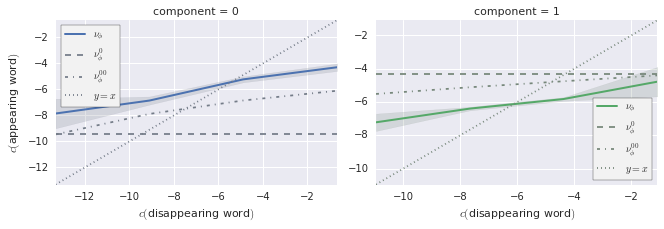

In [38]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `relevant_features`). So note the following:

In [39]:
for feature in relevant_features:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution
                               ._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature)
                 for feature in relevant_features]:
    words.update(tfeature())

data = dict((feature, []) for feature in relevant_features)
words_list = []
for word in words:
    words_list.append(word)
    for feature in relevant_features:
        data[feature].append(Substitution
                             ._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, "
      "only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, "
      "but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'letters_count' is based on 42786 words.



Among all the set of words used by these features, only 14450 are used.

Similarly, we mined 2334 (cluster-unique) substitutions, but the PCA is in fact computed on 1874 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.

## 5 Interactions between features (by Anova)

Some useful variables first.

In [40]:
cuts = [('fixed bins', pd.cut)]#, ('quantiles', pd.qcut)]
rels = [('global', ''), ('sentence-relative', '_rel')]

def star_level(p):
    if p < .001:
        return '***'
    elif p < .01:
        return ' **'
    elif p < .05:
        return '  *'
    else:
        return 'ns.'

Now for each feature, assess if it has an interaction with the other features' **destination value**. We look at this for all pairs of features, with all pairs of global/sentence-relative value and types of binning (fixed width/quantiles). So it's a lot of answers.

Three stars means $p < .001$, two $p < .01$, one $p < .05$, and `ns.` means non-significative.

In [41]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
    * global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


  *** global -> sentence-relative
   ** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


  *** global -> sentence-relative
  ns. sentence-relative -> global
   ** sentence-relative -> sentence-relative

---
aoa
---

-> frequency


  *** global -> global
    * global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering


    * global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density


  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global


  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
    * global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> aoa
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering


  *** global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> letters_count
    * global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density


    * global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global


    * sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency
  *** global -> global
    * global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering


  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  *** sentence-relative -> global


   ** sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency
   ** global -> global
   ** global -> sentence-relative
    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
  ns. global -> global
    * global -> sentence-relative


  ns. sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> clustering


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
    * global -> global
   ** global -> sentence-relative
   ** sentence-relative -> global
    * sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
  *** global -> global
  ns. global -> sentence-relative
   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> aoa


  *** global -> global
   ** global -> sentence-relative


  *** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> clustering
    * global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative



Now for each feature, look at its interaction with the other features' **variation (i.e. destination - source)**. Same drill, same combinations.

In [42]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]\
                    - variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global


  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global


  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global


  ns. global -> sentence-relative


    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global


  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global


  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global


  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
  *** global -> global


  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global


  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global


   ** sentence-relative -> sentence-relative

-> synonyms_count
   ** global -> global


   ** global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency
  *** global -> global


  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering
   ** global -> global


    * global -> sentence-relative


  *** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global


  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency
  ns. global -> global


  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
  ns. global -> global
  ns. global -> sentence-relative
   ** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global


  ns. global -> sentence-relative


   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> letters_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global


  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global


    * sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
  *** global -> global


  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering
    * global -> global


  ns. global -> sentence-relative


   ** sentence-relative -> global
    * sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global


  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative



Ok, so this can go on for a long time, and I'm not going to look at interactions with this lens (meaning at interaction of couples of features with another feature's destination values).

## 6 Regression

In [43]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [44]:
rels = {False: ('global', ''),
        True: ('rel', '_rel')}

def regress(data, features, target,
            source_rel=False, dest_rel=False, interactions=False):
    if source_rel not in [True, False, 'both']:
        raise ValueError
    if not isinstance(dest_rel, bool):
        raise ValueError
    # Process source/destination relativeness arguments.
    if isinstance(source_rel, bool):
        source_rel = [source_rel]
    else:
        source_rel = [False, True]
    dest_rel_name, dest_rel = rels[dest_rel]
    
    features = tuple(sorted(features))
    feature_tuples = [('source' + rels[rel][1], feature)
                      for rel in source_rel
                      for feature in features]
    feature_names = [rels[rel][0] + '_' + feature
                     for rel in source_rel
                     for feature in features]
    
    # Get source and destination values.
    source = pd.pivot_table(
        data,
        values=['source' + rels[rel][1] for rel in source_rel],
        index=['cluster_id'],
        columns=['feature']
    )[feature_tuples].dropna()
    destination = variations[variations.feature == target]\
        .pivot(index='cluster_id', columns='feature',
               values='destination' + dest_rel)\
        .loc[source.index][target].dropna()
    source = source.loc[destination.index].values
    destination = destination.values

    # If asked to, get polynomial features.
    if interactions:
        poly = PolynomialFeatures(degree=2, interaction_only=True)
        source = poly.fit_transform(source)
        regress_features = [' * '.join([feature_names[j]
                                        for j, p in enumerate(powers)
                                        if p > 0]) or 'intercept'
                            for powers in poly.powers_]
    else:
        regress_features = feature_names

    # Regress.
    linreg = linear_model.LinearRegression(fit_intercept=not interactions)
    linreg.fit(source, destination)

    # And print the score and coefficients.
    print('Regressing {} with {} measures, {} interactions'
          .format(dest_rel_name + ' ' + target, len(source),
                  'with' if interactions else 'no'))
    print('           ' + '^' * len(dest_rel_name + ' ' + target))
    print('R^2 = {}'
          .format(linreg.score(source, destination)))
    print()
    coeffs = pd.Series(index=regress_features, data=linreg.coef_)
    if not interactions:
        coeffs = pd.Series(index=['intercept'], data=[linreg.intercept_])\
            .append(coeffs)
    with pd.option_context('display.max_rows', 999):
        print(coeffs)

In [45]:
for target in PAPER_FEATURES:
    print('-' * 70)
    for source_rel, dest_rel in product([False, True, 'both'],
                                        [False, True]):
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel)
        print()
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel, interactions=True)
        print()

----------------------------------------------------------------------
Regressing global frequency with 1487 measures, no interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.07097457733544288

intercept                      5.700915
global_aoa                     0.022391
global_clustering              0.064560
global_frequency               0.364387
global_letters_count          -0.011806
global_orthographic_density   -0.009881
global_synonyms_count          0.037491
dtype: float64

Regressing global frequency with 1487 measures, with interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.08162082829467765

intercept                                              9.127081
global_aoa                                            -0.063240
global_clustering                                      0.661007
global_frequency                                       0.658612
global_letters_count                                  -0.844134
global_orthographic_density                           -0.389673
global_sy

Regressing global frequency with 1487 measures, with interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.054369282743936154

intercept                                        9.419941
rel_aoa                                          0.154328
rel_clustering                                  -0.065480
rel_frequency                                    0.191620
rel_letters_count                               -0.006225
rel_orthographic_density                        -0.041581
rel_synonyms_count                               0.376120
rel_aoa * rel_clustering                        -0.002482
rel_aoa * rel_frequency                          0.048225
rel_aoa * rel_letters_count                      0.016696
rel_aoa * rel_orthographic_density              -0.008003
rel_aoa * rel_synonyms_count                     0.031605
rel_clustering * rel_frequency                  -0.039979
rel_clustering * rel_letters_count              -0.057534
rel_clustering * rel_orthographic_density       -0.024848
rel_clus

Regressing rel frequency with 1487 measures, no interactions
           ^^^^^^^^^^^^^
R^2 = 0.29985789618236525

intercept                      4.564213
global_aoa                    -0.051356
global_clustering              0.250925
global_frequency              -0.514687
global_letters_count           0.228687
global_orthographic_density    0.227107
global_synonyms_count         -0.078034
rel_aoa                        0.087157
rel_clustering                -0.193230
rel_frequency                  0.911721
rel_letters_count             -0.243609
rel_orthographic_density      -0.237293
rel_synonyms_count             0.104632
dtype: float64

Regressing rel frequency with 1487 measures, with interactions
           ^^^^^^^^^^^^^
R^2 = 0.3316977749152135

intercept                                                -26.188726
global_aoa                                                -0.480228
global_clustering                                         -7.705665
global_frequency                 

Regressing rel aoa with 1362 measures, with interactions
           ^^^^^^^
R^2 = 0.034130357896801744

intercept                                             -5.092516
global_aoa                                             0.283783
global_clustering                                     -1.020887
global_frequency                                       0.440634
global_letters_count                                   0.289485
global_orthographic_density                           -0.970563
global_synonyms_count                                 -0.806657
global_aoa * global_clustering                         0.038254
global_aoa * global_frequency                         -0.012702
global_aoa * global_letters_count                      0.014468
global_aoa * global_orthographic_density               0.047462
global_aoa * global_synonyms_count                     0.036980
global_clustering * global_frequency                   0.064785
global_clustering * global_letters_count               0.068715


intercept                      1.851231
global_aoa                     0.473409
global_clustering             -0.340431
global_frequency              -0.058317
global_letters_count           0.183798
global_orthographic_density   -0.078031
global_synonyms_count          0.250969
rel_aoa                       -0.303463
rel_clustering                 0.278404
rel_frequency                 -0.064241
rel_letters_count             -0.153735
rel_orthographic_density       0.064421
rel_synonyms_count            -0.459957
dtype: float64

Regressing global aoa with 1362 measures, with interactions
           ^^^^^^^^^^
R^2 = 0.1667574983268414

intercept                                                 27.336601
global_aoa                                                 2.095191
global_clustering                                          6.900913
global_frequency                                           1.126850
global_letters_count                                      -1.962132
global_orthograp

Regressing global clustering with 1222 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.04554616200053563

intercept                                             -3.497981
global_aoa                                             0.104778
global_clustering                                      0.379925
global_frequency                                      -0.402657
global_letters_count                                   0.198563
global_orthographic_density                            0.265952
global_synonyms_count                                 -0.010847
global_aoa * global_clustering                         0.020737
global_aoa * global_frequency                          0.004005
global_aoa * global_letters_count                     -0.001522
global_aoa * global_orthographic_density              -0.003400
global_aoa * global_synonyms_count                    -0.009814
global_clustering * global_frequency                  -0.059472
global_clustering * global_letters_count     

Regressing rel clustering with 1222 measures, with interactions
           ^^^^^^^^^^^^^^
R^2 = 0.10957067594070424

intercept                                        0.301065
rel_aoa                                         -0.039251
rel_clustering                                   0.328672
rel_frequency                                    0.017845
rel_letters_count                                0.001120
rel_orthographic_density                         0.001551
rel_synonyms_count                              -0.080088
rel_aoa * rel_clustering                         0.030411
rel_aoa * rel_frequency                         -0.007072
rel_aoa * rel_letters_count                     -0.010984
rel_aoa * rel_orthographic_density              -0.017546
rel_aoa * rel_synonyms_count                    -0.011411
rel_clustering * rel_frequency                  -0.000852
rel_clustering * rel_letters_count               0.001088
rel_clustering * rel_orthographic_density        0.021904
rel_clusterin

Regressing global letters_count with 1487 measures, no interactions
           ^^^^^^^^^^^^^^^^^^^^
R^2 = 0.07657973529824014

intercept                      4.451055
global_aoa                     0.048154
global_clustering             -0.164599
global_frequency              -0.039239
global_letters_count           0.221691
global_orthographic_density   -0.142223
global_synonyms_count         -0.287914
dtype: float64

Regressing global letters_count with 1487 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^
R^2 = 0.08634649243421122

intercept                                             -3.506807
global_aoa                                             0.338170
global_clustering                                     -2.120391
global_frequency                                       0.097560
global_letters_count                                   0.431430
global_orthographic_density                           -0.579316
global_synonyms_count                                  2.060482


Regressing global letters_count with 1487 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^
R^2 = 0.06828235030376495

intercept                                        5.572653
rel_aoa                                         -0.175736
rel_clustering                                   0.043909
rel_frequency                                    0.004026
rel_letters_count                                0.350073
rel_orthographic_density                        -0.358037
rel_synonyms_count                              -0.638076
rel_aoa * rel_clustering                         0.094003
rel_aoa * rel_frequency                         -0.017521
rel_aoa * rel_letters_count                      0.008359
rel_aoa * rel_orthographic_density               0.014802
rel_aoa * rel_synonyms_count                    -0.083957
rel_clustering * rel_frequency                  -0.007322
rel_clustering * rel_letters_count              -0.054287
rel_clustering * rel_orthographic_density       -0.060096
r

Regressing rel letters_count with 1487 measures, no interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.16338816401455014

intercept                      0.571573
global_aoa                     0.145749
global_clustering             -0.395492
global_frequency               0.075070
global_letters_count          -0.619892
global_orthographic_density   -0.243928
global_synonyms_count         -0.126335
rel_aoa                       -0.154885
rel_clustering                 0.270253
rel_frequency                 -0.132734
rel_letters_count              0.871580
rel_orthographic_density       0.130856
rel_synonyms_count            -0.136342
dtype: float64

Regressing rel letters_count with 1487 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.20227968467466584

intercept                                                 19.821719
global_aoa                                                -0.596744
global_clustering                                          4.065272
global_frequency

Regressing rel synonyms_count with 1441 measures, with interactions
           ^^^^^^^^^^^^^^^^^^
R^2 = 0.021310135082451498

intercept                                              2.284819
global_aoa                                             0.011913
global_clustering                                      0.392921
global_frequency                                      -0.119455
global_letters_count                                  -0.083944
global_orthographic_density                           -0.308461
global_synonyms_count                                 -0.124865
global_aoa * global_clustering                        -0.004064
global_aoa * global_frequency                         -0.000507
global_aoa * global_letters_count                     -0.005715
global_aoa * global_orthographic_density              -0.007290
global_aoa * global_synonyms_count                     0.031701
global_clustering * global_frequency                  -0.018870
global_clustering * global_letters_count  

intercept                      1.414982
global_aoa                     0.002252
global_clustering              0.098726
global_frequency              -0.013972
global_letters_count          -0.042614
global_orthographic_density   -0.069642
global_synonyms_count          0.115281
rel_aoa                       -0.011825
rel_clustering                -0.085711
rel_frequency                  0.008087
rel_letters_count              0.025582
rel_orthographic_density       0.058074
rel_synonyms_count             0.007816
dtype: float64

Regressing global synonyms_count with 1441 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.07193127345880179

intercept                                                 6.779176
global_aoa                                               -0.128724
global_clustering                                         1.354384
global_frequency                                         -0.288295
global_letters_count                                     -0.03518

Regressing global orthographic_density with 1234 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.09320348323462624

intercept                                              5.998343
global_aoa                                            -0.305824
global_clustering                                      0.666341
global_frequency                                      -0.083385
global_letters_count                                  -0.332188
global_orthographic_density                            0.076109
global_synonyms_count                                 -0.491549
global_aoa * global_clustering                        -0.035504
global_aoa * global_frequency                         -0.000961
global_aoa * global_letters_count                      0.004229
global_aoa * global_orthographic_density               0.019404
global_aoa * global_synonyms_count                     0.032294
global_clustering * global_frequency                  -0.013766
global_clustering * globa

Regressing rel orthographic_density with 1234 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.10161653503444401

intercept                                       -0.522349
rel_aoa                                          0.088513
rel_clustering                                   0.026214
rel_frequency                                    0.047587
rel_letters_count                               -0.023874
rel_orthographic_density                         0.329509
rel_synonyms_count                               0.256770
rel_aoa * rel_clustering                        -0.001156
rel_aoa * rel_frequency                          0.015020
rel_aoa * rel_letters_count                      0.000014
rel_aoa * rel_orthographic_density               0.031797
rel_aoa * rel_synonyms_count                     0.078189
rel_clustering * rel_frequency                  -0.004288
rel_clustering * rel_letters_count              -0.016843
rel_clustering * rel_orthographic_density       -0.